<a href="https://colab.research.google.com/github/krisbarbier/Week-17-Lessons/blob/main/Week_17_Practice_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 17 Practice Codes

## Insights for Stakeholders

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [3]:
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)
df.head(3)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   
2     GP   F   15       U     LE3       T     1     1  at_home    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   

   Walc  health  absences  G1  G2  G3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12

In [4]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)


Column   dtype  # null  null (%)  nunique      min         max
0       school  object       0       0.0        2       GP          MS
1          sex  object       0       0.0        2        F           M
2          age   int64       0       0.0        8       15          22
3      address  object       0       0.0        2        R           U
4      famsize  object       0       0.0        2      GT3         LE3
5      Pstatus  object       0       0.0        2        A           T
6         Medu   int64       0       0.0        5        0           4
7         Fedu   int64       0       0.0        5        0           4
8         Mjob  object       0       0.0        5  at_home     teacher
9         Fjob  object       0       0.0        5  at_home     teacher
10      reason  object       0       0.0        4   course  reputation
11    guardian  object       0       0.0        3   father       other
12  traveltime   int64       0       0.0        4        1           4
13   studytime   int64       0       0.0        4        1           4
14    failures   int64       0       0.0        4        0           3
15   schoolsup  object       0       0.0        2       no         yes
16      famsup  object       0       0.0        2       no         yes
17        paid  object       0       0.0        2       no         yes
18  activities  object       0       0.0        2       no         yes
19     nursery  object       0       0.0        2       no         yes
20      higher  object       0       0.0        2       no         yes
21    internet  object       0       0.0        2       no         yes
22    romantic  object       0       0.0        2       no         yes
23      famrel   int64       0       0.0        5        1           5
24    freetime   int64       0       0.0        5        1           5
25       goout   int64       0       0.0        5        1           5
26        Dalc   int64       0       0.0        5        1           5
27        Walc   int64       0       0.0        5        1           5
28      health   int64       0       0.0        5        1           5
29    absences   int64       0       0.0       24        0          32
30          G1   int64       0       0.0       17        0          19
31          G2   int64       0       0.0       16        0          19
32          G3   int64       0       0.0       17        0          19

In [5]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'


Text(0.5, 1.0, 'Distribution of Final Grades')

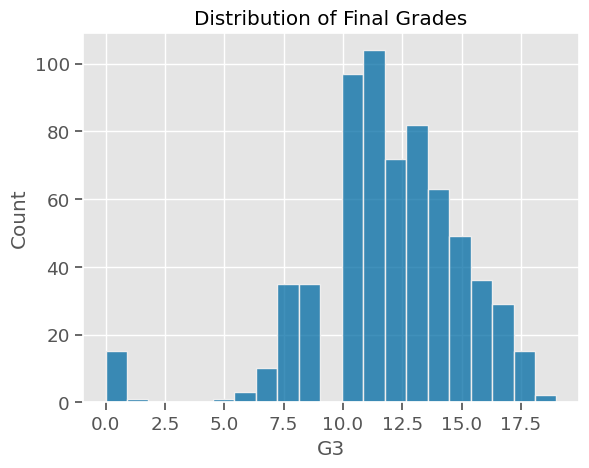

In [6]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades")

## SKlearn v1.1+

In [7]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")


Python 3.10.12
sklearn version: 1.2.2


### set text displays for sklearn - if needed
from sklearn import set_config
set_config(display='text')

In [8]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)


In [10]:
## Load in the student performance - portuguese dataset & display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   
2     GP   F   15       U     LE3       T     1     1  at_home    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   

   Walc  health  absences  G1  G2  G3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12

In [11]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
54      GP   F   15       U     LE3       A     3     3    other     other   
208     GP   M   16       U     GT3       T     2     3    other     other   
23      GP   M   16       U     LE3       T     2     2    other     other   
547     MS   M   16       R     LE3       T     4     1    other   at_home   
604     MS   F   18       U     GT3       T     1     1  at_home  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
54        other   mother           1          1         0        no     no   
208        home   father           2          1         0        no     no   
23   reputation   mother           2          2         0        no    yes   
547       other   father           1          1         0        no     no   
604      course   mother           3          2         1        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
54    no         no     yes    yes      yes       no       5         3      4   
208   no         no     yes    yes      yes       no       5         3      3   
23    no        yes     yes    yes      yes       no       5         4      4   
547   no         no     yes    yes      yes       no       4         1      2   
604   no         no     yes     no       no       no       4         4      2   

     Dalc  Walc  health  absences  G1  G2  
54      4     4       1         0  13  12  
208     1     1       3         0  13  12  
23      2     4       5         2  10  10  
547     2     1       2         0  10  11  
604     1     2       2         2   9  10

In [12]:
## make categorical selector and verify it works
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [13]:
## make numeric selector and verify it works
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)


['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [14]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


In [15]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                       verbose_feature_names_out=False)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc99c3cb310>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc99b73fd60>)],
                  verbose_feature_names_out=False)

In [16]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names


array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'], dtype=object)

In [17]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
54   15.0   3.0   3.0         1.0        1.0       0.0     5.0       3.0   
208  16.0   2.0   3.0         2.0        1.0       0.0     5.0       3.0   
23   16.0   2.0   2.0         2.0        2.0       0.0     5.0       4.0   

     goout  Dalc  Walc  health  absences    G1    G2  school_GP  school_MS  \
54     4.0   4.0   4.0     1.0       0.0  13.0  12.0        1.0        0.0   
208    3.0   1.0   1.0     3.0       0.0  13.0  12.0        1.0        0.0   
23     4.0   2.0   4.0     5.0       2.0  10.0  10.0        1.0        0.0   

     sex_F  sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
54     1.0    0.0        0.0        1.0          0.0          1.0        1.0   
208    0.0    1.0        0.0        1.0          1.0          0.0        0.0   
23     0.0    1.0        0.0        1.0          0.0          1.0        0.0   

     Pstatus_T  ...  Fjob_services  Fjob_teacher  reason_course  reason_home  \
54         0.0  ...            0.0           0.0            0.0          0.0   
208        1.0  ...            0.0           0.0            0.0          1.0   
23         1.0  ...            0.0           0.0            0.0          0.0   

     reason_other  reason_reputation  guardian_father  guardian_mother  \
54            1.0                0.0              0.0              1.0   
208           0.0                0.0              1.0              0.0   
23            0.0                1.0              0.0              1.0   

     guardian_other  schoolsup_no  schoolsup_yes  famsup_no  famsup_yes  \
54              0.0           1.0            0.0        1.0         0.0   
208             0.0           1.0            0.0        1.0         0.0   
23              0.0           1.0            0.0        0.0         1.0   

     paid_no  paid_yes  activities_no  activities_yes  nursery_no  \
54       1.0       0.0            1.0             0.0         0.0   
208      1.0       0.0            1.0             0.0         0.0   
23       1.0       0.0            0.0             1.0         0.0   

     nursery_yes  higher_no  higher_yes  internet_no  internet_yes  \
54           1.0        0.0         1.0          0.0           1.0   
208          1.0        0.0         1.0          0.0           1.0   
23           1.0        0.0         1.0          0.0           1.0   

     romantic_no  romantic_yes  
54           1.0           0.0  
208          1.0           0.0  
23           1.0           0.0  

[3 rows x 58 columns]

In [18]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
104  15.0   3.0   4.0         1.0        2.0       0.0     5.0       4.0   
284  18.0   2.0   1.0         1.0        1.0       2.0     3.0       2.0   
579  18.0   1.0   3.0         1.0        1.0       0.0     4.0       3.0   

     goout  Dalc  Walc  health  absences    G1    G2  school_GP  school_MS  \
104    4.0   1.0   1.0     1.0       0.0  16.0  16.0        1.0        0.0   
284    5.0   2.0   5.0     5.0       4.0   7.0   8.0        1.0        0.0   
579    3.0   2.0   3.0     3.0       0.0   9.0  10.0        0.0        1.0   

     sex_F  sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
104    0.0    1.0        0.0        1.0          1.0          0.0        1.0   
284    0.0    1.0        0.0        1.0          1.0          0.0        0.0   
579    0.0    1.0        0.0        1.0          0.0          1.0        0.0   

     Pstatus_T  ...  Fjob_services  Fjob_teacher  reason_course  reason_home  \
104        0.0  ...            0.0           0.0            1.0          0.0   
284        1.0  ...            1.0           0.0            0.0          0.0   
579        1.0  ...            1.0           0.0            1.0          0.0   

     reason_other  reason_reputation  guardian_father  guardian_mother  \
104           0.0                0.0              0.0              1.0   
284           1.0                0.0              0.0              1.0   
579           0.0                0.0              0.0              1.0   

     guardian_other  schoolsup_no  schoolsup_yes  famsup_no  famsup_yes  \
104             0.0           1.0            0.0        0.0         1.0   
284             0.0           1.0            0.0        1.0         0.0   
579             0.0           1.0            0.0        1.0         0.0   

     paid_no  paid_yes  activities_no  activities_yes  nursery_no  \
104      1.0       0.0            0.0             1.0         0.0   
284      1.0       0.0            1.0             0.0         1.0   
579      1.0       0.0            1.0             0.0         0.0   

     nursery_yes  higher_no  higher_yes  internet_no  internet_yes  \
104          1.0        0.0         1.0          0.0           1.0   
284          0.0        1.0         0.0          0.0           1.0   
579          1.0        1.0         0.0          0.0           1.0   

     romantic_no  romantic_yes  
104          1.0           0.0  
284          1.0           0.0  
579          0.0           1.0  

[3 rows x 58 columns]

In [19]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)


104    16
284     6
579     9
Name: G3, dtype: int64

## Feature Importance

In [20]:
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [21]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)


Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


In [22]:
reg.feature_importances_


array([9.06096804e-03, 4.27750617e-03, 3.98699965e-03, 7.00472751e-03,
       2.25626018e-03, 3.51399028e-03, 2.49268280e-03, 7.28098375e-03,
       5.16832208e-03, 7.96493073e-03, 3.65255869e-03, 3.45093237e-03,
       2.12456262e-02, 1.43357641e-02, 8.49691456e-01, 1.50552537e-03,
       1.34049006e-03, 8.01336123e-04, 2.00642049e-03, 9.16339891e-04,
       1.07877854e-03, 7.07605663e-04, 9.56989326e-04, 5.25321529e-04,
       3.57271546e-04, 7.24549353e-04, 4.69078763e-04, 1.72276703e-03,
       7.87754005e-04, 4.04612977e-03, 4.95701770e-04, 6.32101752e-04,
       2.02437914e-03, 2.64153718e-03, 2.88623322e-04, 1.66038340e-03,
       1.49827250e-03, 7.13793226e-03, 1.32903677e-03, 2.40072554e-03,
       1.19251978e-03, 6.59015769e-04, 1.29186344e-03, 1.17453508e-03,
       2.87137667e-03, 2.08767090e-03, 4.90905227e-04, 2.05326973e-04,
       6.07999604e-04, 6.08562065e-04, 1.09193794e-03, 1.09819114e-03,
       3.43745866e-04, 3.14073124e-04, 3.66951986e-04, 5.29971880e-04,
      

In [23]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)


58
58


True

In [24]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances


age                  0.009061
Medu                 0.004278
Fedu                 0.003987
traveltime           0.007005
studytime            0.002256
failures             0.003514
famrel               0.002493
freetime             0.007281
goout                0.005168
Dalc                 0.007965
Walc                 0.003653
health               0.003451
absences             0.021246
G1                   0.014336
G2                   0.849691
school_GP            0.001506
school_MS            0.001340
sex_F                0.000801
sex_M                0.002006
address_R            0.000916
address_U            0.001079
famsize_GT3          0.000708
famsize_LE3          0.000957
Pstatus_A            0.000525
Pstatus_T            0.000357
Mjob_at_home         0.000725
Mjob_health          0.000469
Mjob_other           0.001723
Mjob_services        0.000788
Mjob_teacher         0.004046
Fjob_at_home         0.000496
Fjob_health          0.000632
Fjob_other           0.002024
Fjob_servi

In [25]:
importances.sum()


0.9999999999999999

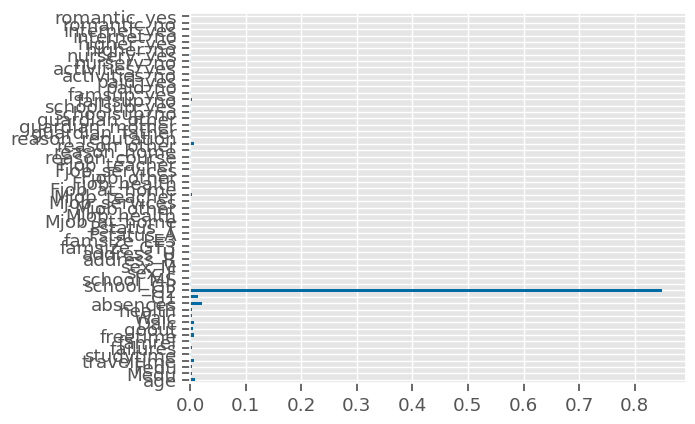

In [26]:
# plot importance
ax = importances.plot(kind='barh')

In [27]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance


G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

<Axes: >

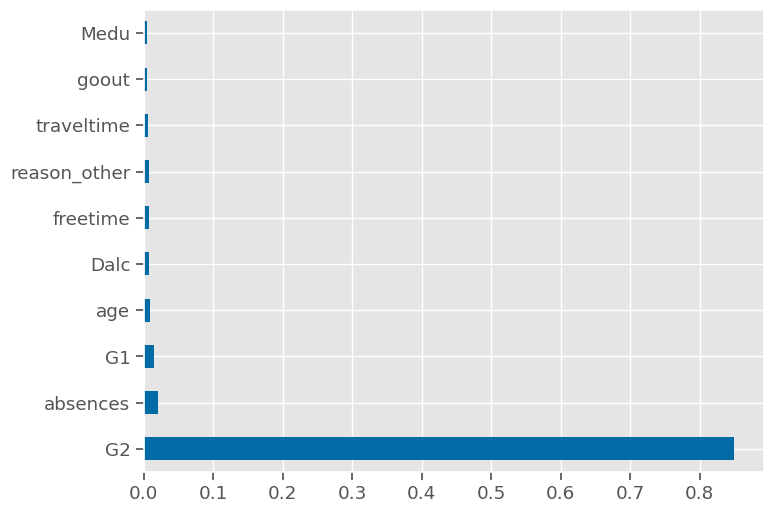

In [28]:
## just keep the top 10 importances and plot
sorted_importance.head(10).plot(kind='barh',
                                   figsize=(8,6))

In [29]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance


paid_yes             0.000205
Fjob_teacher         0.000289
higher_yes           0.000314
higher_no            0.000344
Pstatus_T            0.000357
internet_no          0.000367
Mjob_health          0.000469
paid_no              0.000491
Fjob_at_home         0.000496
Pstatus_A            0.000525
internet_yes         0.000530
activities_no        0.000608
activities_yes       0.000609
Fjob_health          0.000632
guardian_other       0.000659
romantic_yes         0.000678
famsize_GT3          0.000708
Mjob_at_home         0.000725
Mjob_services        0.000788
sex_F                0.000801
address_R            0.000916
romantic_no          0.000948
famsize_LE3          0.000957
address_U            0.001079
nursery_no           0.001092
nursery_yes          0.001098
schoolsup_yes        0.001175
guardian_mother      0.001193
schoolsup_no         0.001292
reason_reputation    0.001329
school_MS            0.001340
reason_home          0.001498
school_GP            0.001506
reason_cou

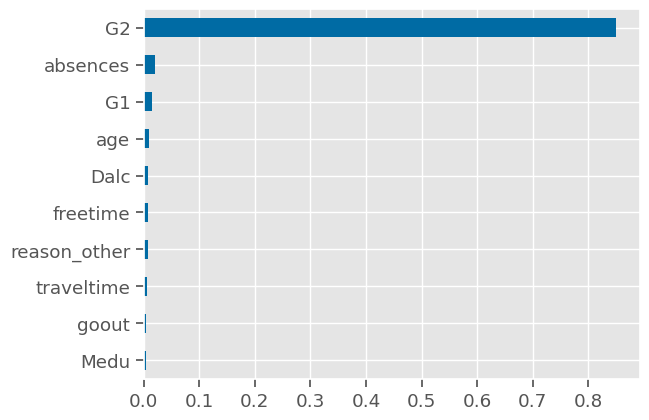

In [30]:
## just keep the top 10 importances and plot (that are now at the bottom of our series)
ax = sorted_importance.tail(10).plot(kind='barh')


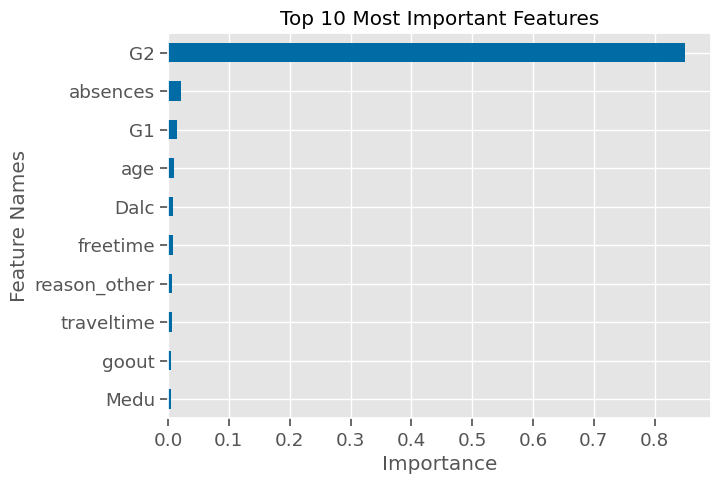

In [31]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');


In [32]:
## displaying the Axis
ax


<Axes: title={'center': 'Top 10 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

In [33]:
## using the ax to get the fig
fig_ax = ax.get_figure()


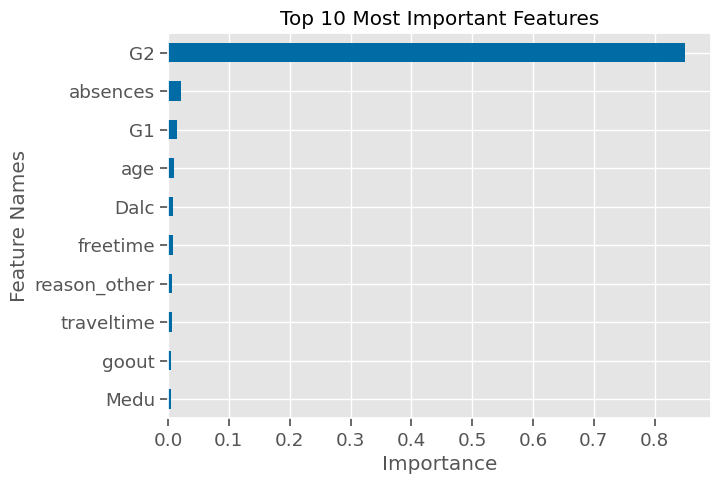

In [34]:
fig_ax


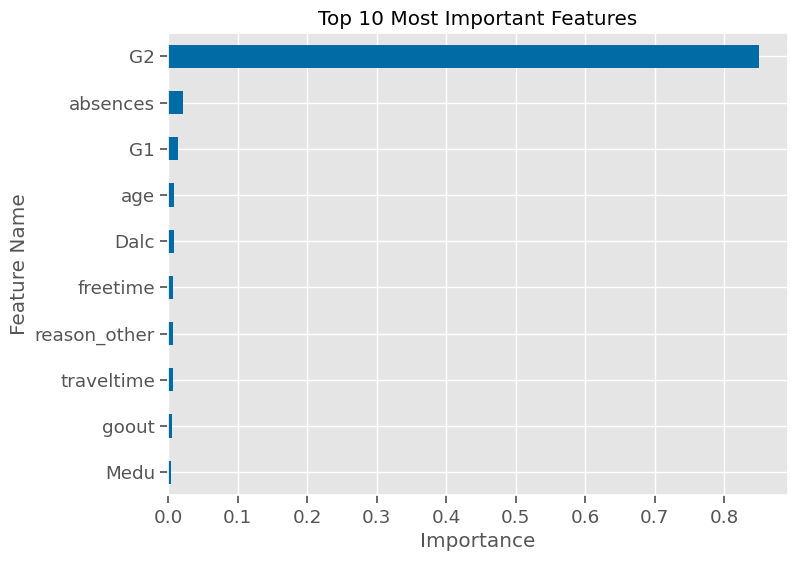

In [35]:
## Using plt.gcf to get the fig
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(8,6), xlabel='Importance',
                                    ylabel='Feature Name',
                                    title='Top 10 Most Important Features')
fig_gcf = plt.gcf()


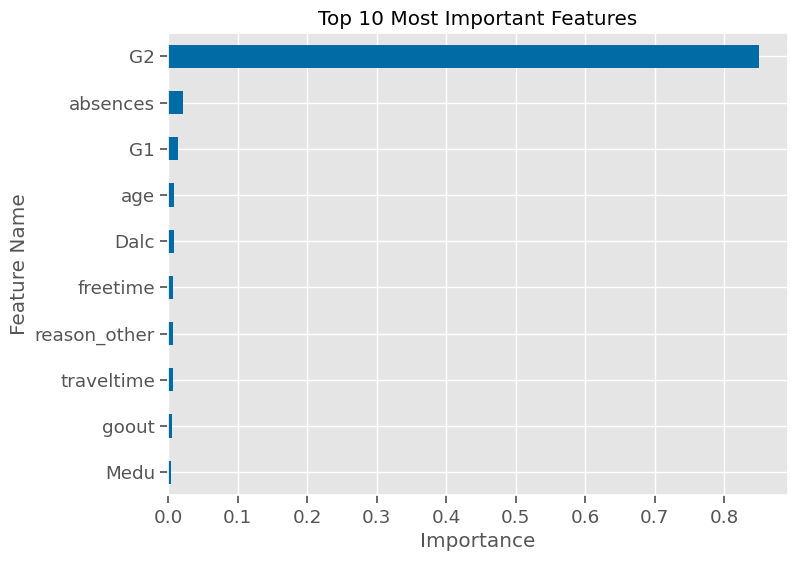

In [36]:
fig_gcf

In [37]:
## extracting feature names from the model
reg.feature_names_in_


array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'], dtype=object)

In [38]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances


In [39]:
importances = get_importances(reg,sort=True,ascending=False)
importances


G2                   0.849691
absences             0.021246
G1                   0.014336
age                  0.009061
Dalc                 0.007965
freetime             0.007281
reason_other         0.007138
traveltime           0.007005
goout                0.005168
Medu                 0.004278
Mjob_teacher         0.004046
Fedu                 0.003987
Walc                 0.003653
failures             0.003514
health               0.003451
famsup_no            0.002871
Fjob_services        0.002642
famrel               0.002493
guardian_father      0.002401
studytime            0.002256
famsup_yes           0.002088
Fjob_other           0.002024
sex_M                0.002006
Mjob_other           0.001723
reason_course        0.001660
school_GP            0.001506
reason_home          0.001498
school_MS            0.001340
reason_reputation    0.001329
schoolsup_no         0.001292
guardian_mother      0.001193
schoolsup_yes        0.001175
nursery_yes          0.001098
nursery_no

In [40]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax


<Axes: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

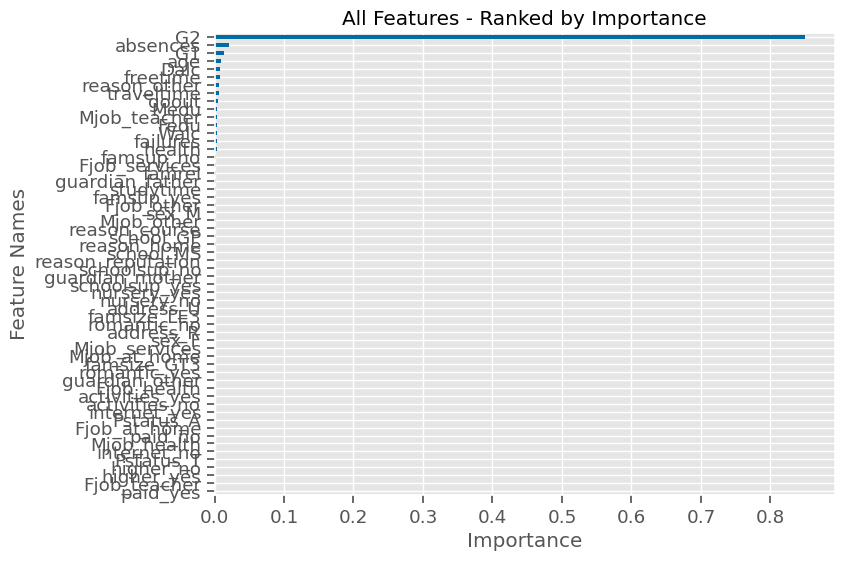

In [41]:
## testing our function
plot_importance(importances)


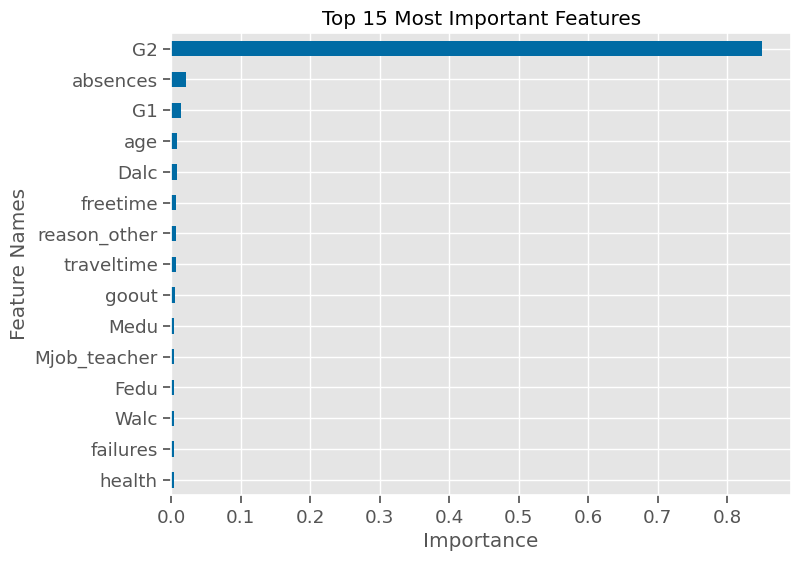

In [42]:
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);


Training Data:	R^2= 0.98	RMSE= 0.52
Test Data:	R^2= 0.83	RMSE= 1.26


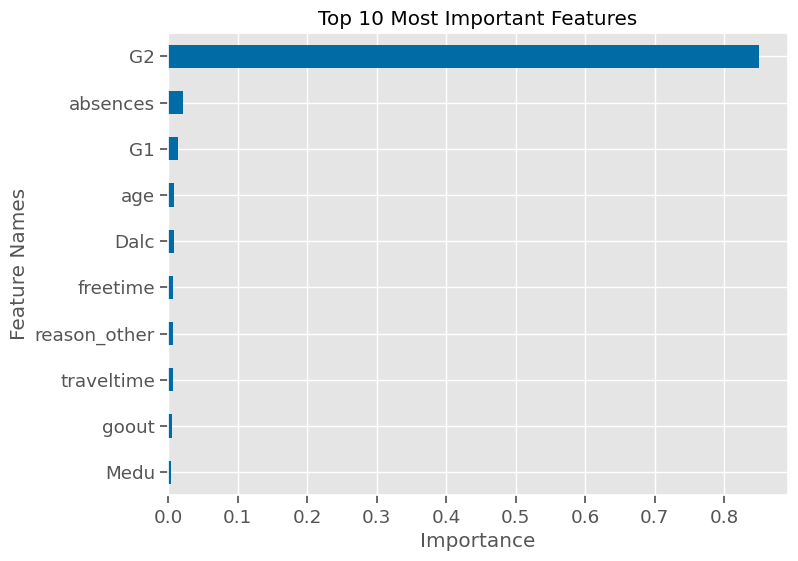

In [43]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);


In [44]:
importances.sort_values(ascending=False).head(4)


G2          0.849691
absences    0.021246
G1          0.014336
age         0.009061
Name: Feature Importance, dtype: float64

In [45]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
54   15.0   3.0   3.0         1.0        1.0       0.0     5.0       3.0   
208  16.0   2.0   3.0         2.0        1.0       0.0     5.0       3.0   
23   16.0   2.0   2.0         2.0        2.0       0.0     5.0       4.0   
547  16.0   4.0   1.0         1.0        1.0       0.0     4.0       1.0   
604  18.0   1.0   1.0         3.0        2.0       1.0     4.0       4.0   
..    ...   ...   ...         ...        ...       ...     ...       ...   
333  17.0   1.0   1.0         1.0        3.0       0.0     4.0       3.0   
454  16.0   1.0   2.0         1.0        3.0       1.0     1.0       3.0   
56   15.0   4.0   3.0         1.0        2.0       0.0     4.0       3.0   
203  17.0   1.0   2.0         1.0        2.0       0.0     3.0       1.0   
182  16.0   2.0   2.0         1.0        2.0       0.0     5.0       1.0   

     goout  Dalc  Walc  health  absences    G1    G2  school_GP  school_MS  \
54     4.0   4.0   4.0     1.0       0.0  13.0  12.0        1.0        0.0   
208    3.0   1.0   1.0     3.0       0.0  13.0  12.0        1.0        0.0   
23     4.0   2.0   4.0     5.0       2.0  10.0  10.0        1.0        0.0   
547    2.0   2.0   1.0     2.0       0.0  10.0  11.0        0.0        1.0   
604    2.0   1.0   2.0     2.0       2.0   9.0  10.0        0.0        1.0   
..     ...   ...   ...     ...       ...   ...   ...        ...        ...   
333    3.0   1.0   1.0     3.0       0.0  13.0  13.0        1.0        0.0   
454    2.0   1.0   2.0     4.0       3.0   9.0   8.0        0.0        1.0   
56     2.0   1.0   1.0     1.0       0.0  15.0  14.0        1.0        0.0   
203    3.0   1.0   5.0     3.0       6.0   9.0   9.0        1.0        0.0   
182    5.0   1.0   1.0     4.0       0.0  12.0  12.0        1.0        0.0   

     sex_F  sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  \
54     1.0    0.0        0.0        1.0          0.0          1.0        1.0   
208    0.0    1.0        0.0        1.0          1.0          0.0        0.0   
23     0.0    1.0        0.0        1.0          0.0          1.0        0.0   
547    0.0    1.0        1.0        0.0          0.0          1.0        0.0   
604    1.0    0.0        0.0        1.0          1.0          0.0        0.0   
..     ...    ...        ...        ...          ...          ...        ...   
333    1.0    0.0        0.0        1.0          1.0          0.0        0.0   
454    1.0    0.0        0.0        1.0          1.0          0.0        0.0   
56     1.0    0.0        0.0        1.0          1.0          0.0        1.0   
203    0.0    1.0        1.0        0.0          1.0          0.0        0.0   
182    1.0    0.0        0.0        1.0          1.0          0.0        0.0   

     Pstatus_T  ...  Fjob_teacher  reason_course  reason_home  reason_other  \
54         0.0  ...           0.0            0.0          0.0           1.0   
208        1.0  ...           0.0            0.0          1.0           0.0   
23         1.0  ...           0.0            0.0          0.0           0.0   
547        1.0  ...           0.0            0.0          0.0           1.0   
604        1.0  ...           0.0            1.0          0.0           0.0   
..         ...  ...           ...            ...          ...           ...   
333        1.0  ...           1.0            0.0          0.0           0.0   
454        1.0  ...           0.0            1.0          0.0           0.0   
56         0.0  ...           0.0            0.0          0.0           0.0   
203        1.0  ...           0.0            0.0          1.0           0.0   
182        1.0  ...           0.0            0.0          1.0           0.0   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
54                 0.0              0.0              1.0             0.0   
208                0.0              1.0              0.0             0.0   
23                

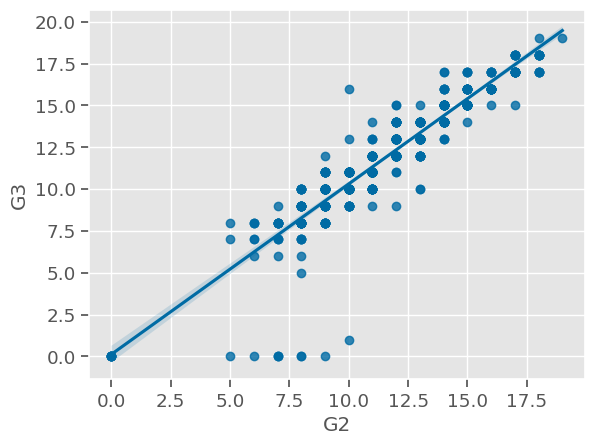

In [46]:
sns.regplot(data=plot_df, x='G2',y='G3');


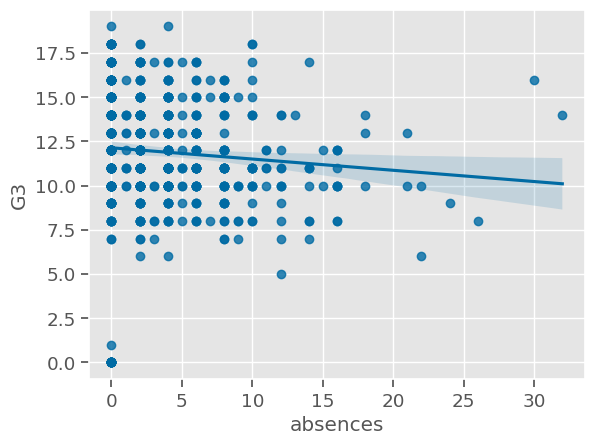

In [47]:
sns.regplot(data=plot_df, x='absences',y='G3');


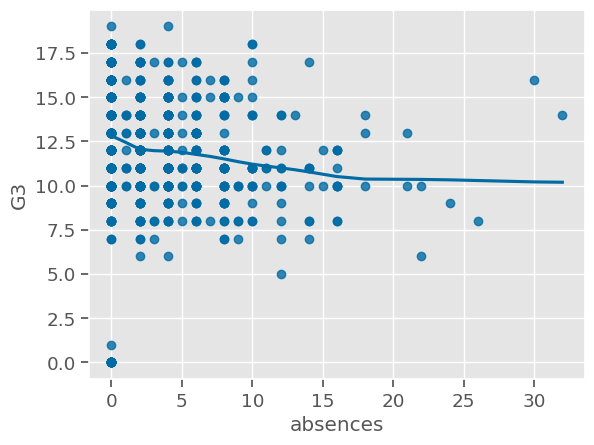

In [48]:
sns.regplot(data=plot_df, x='absences',y='G3', lowess=True);


<Axes: xlabel='G1', ylabel='G3'>

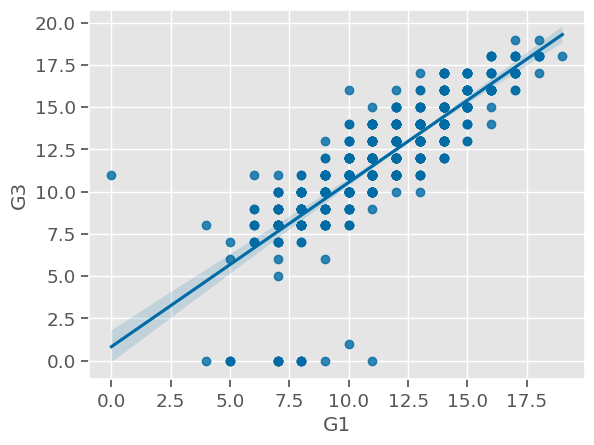

In [49]:
sns.regplot(data=plot_df, x='G1',y='G3')

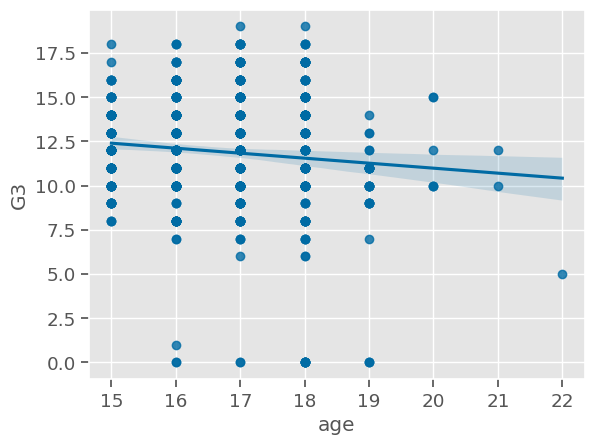

In [50]:
sns.regplot(data=plot_df, x='age',y='G3');

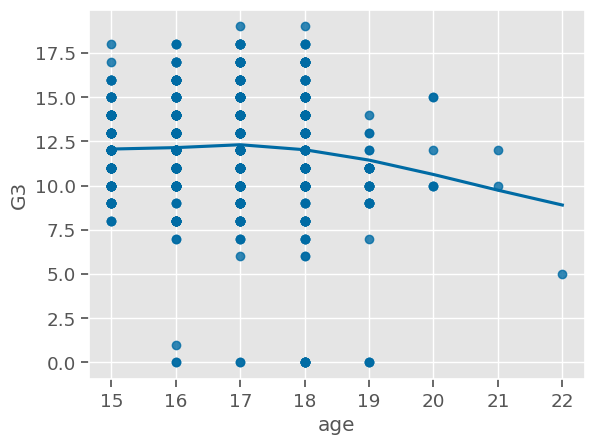

In [51]:
sns.regplot(data=plot_df, x='age',y='G3',lowess=True);


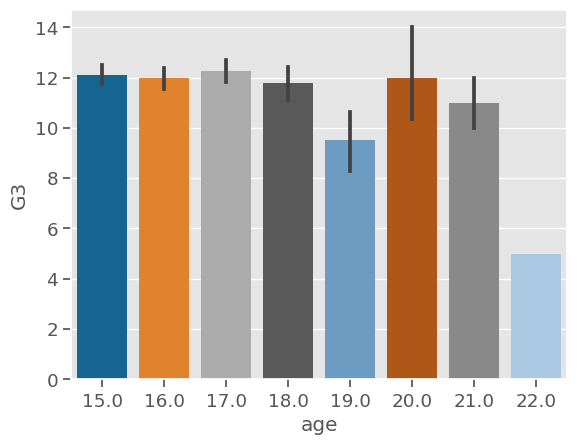

In [52]:
sns.barplot(data=plot_df, x='age',y='G3');


<Axes: xlabel='age', ylabel='G3'>

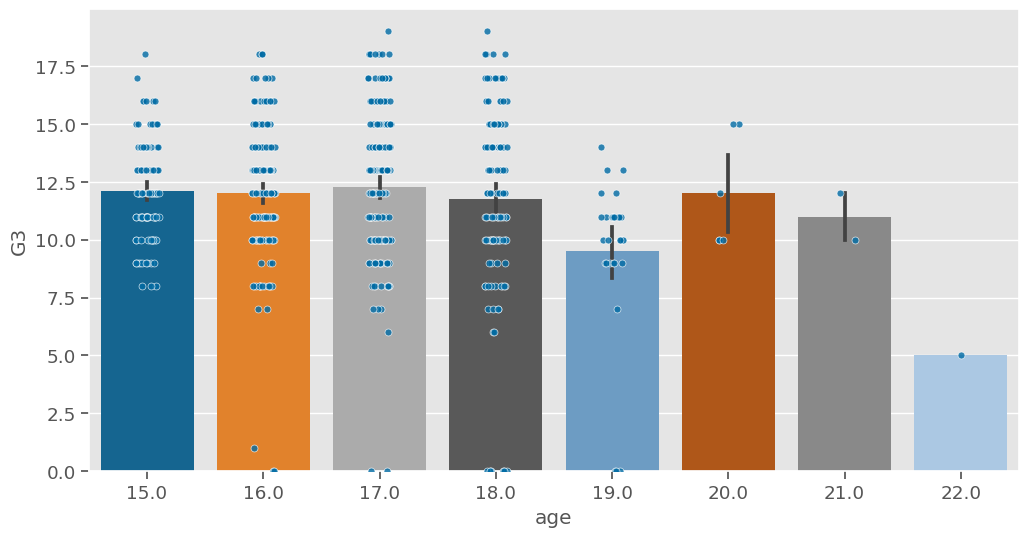

In [53]:
## adding a swarmplot to visualize each point
plt.figure(figsize=(12,6))
sns.stripplot(data=plot_df, x='age',y='G3',size=5,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=plot_df, x='age',y='G3')#,palette='dark');

In [54]:
example_tree =  reg.estimators_[0]
example_tree


DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [55]:
evaluate_regression(example_tree,X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.88	RMSE= 1.16
Test Data:	R^2= 0.71	RMSE= 1.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [56]:
example_tree.get_depth()


12

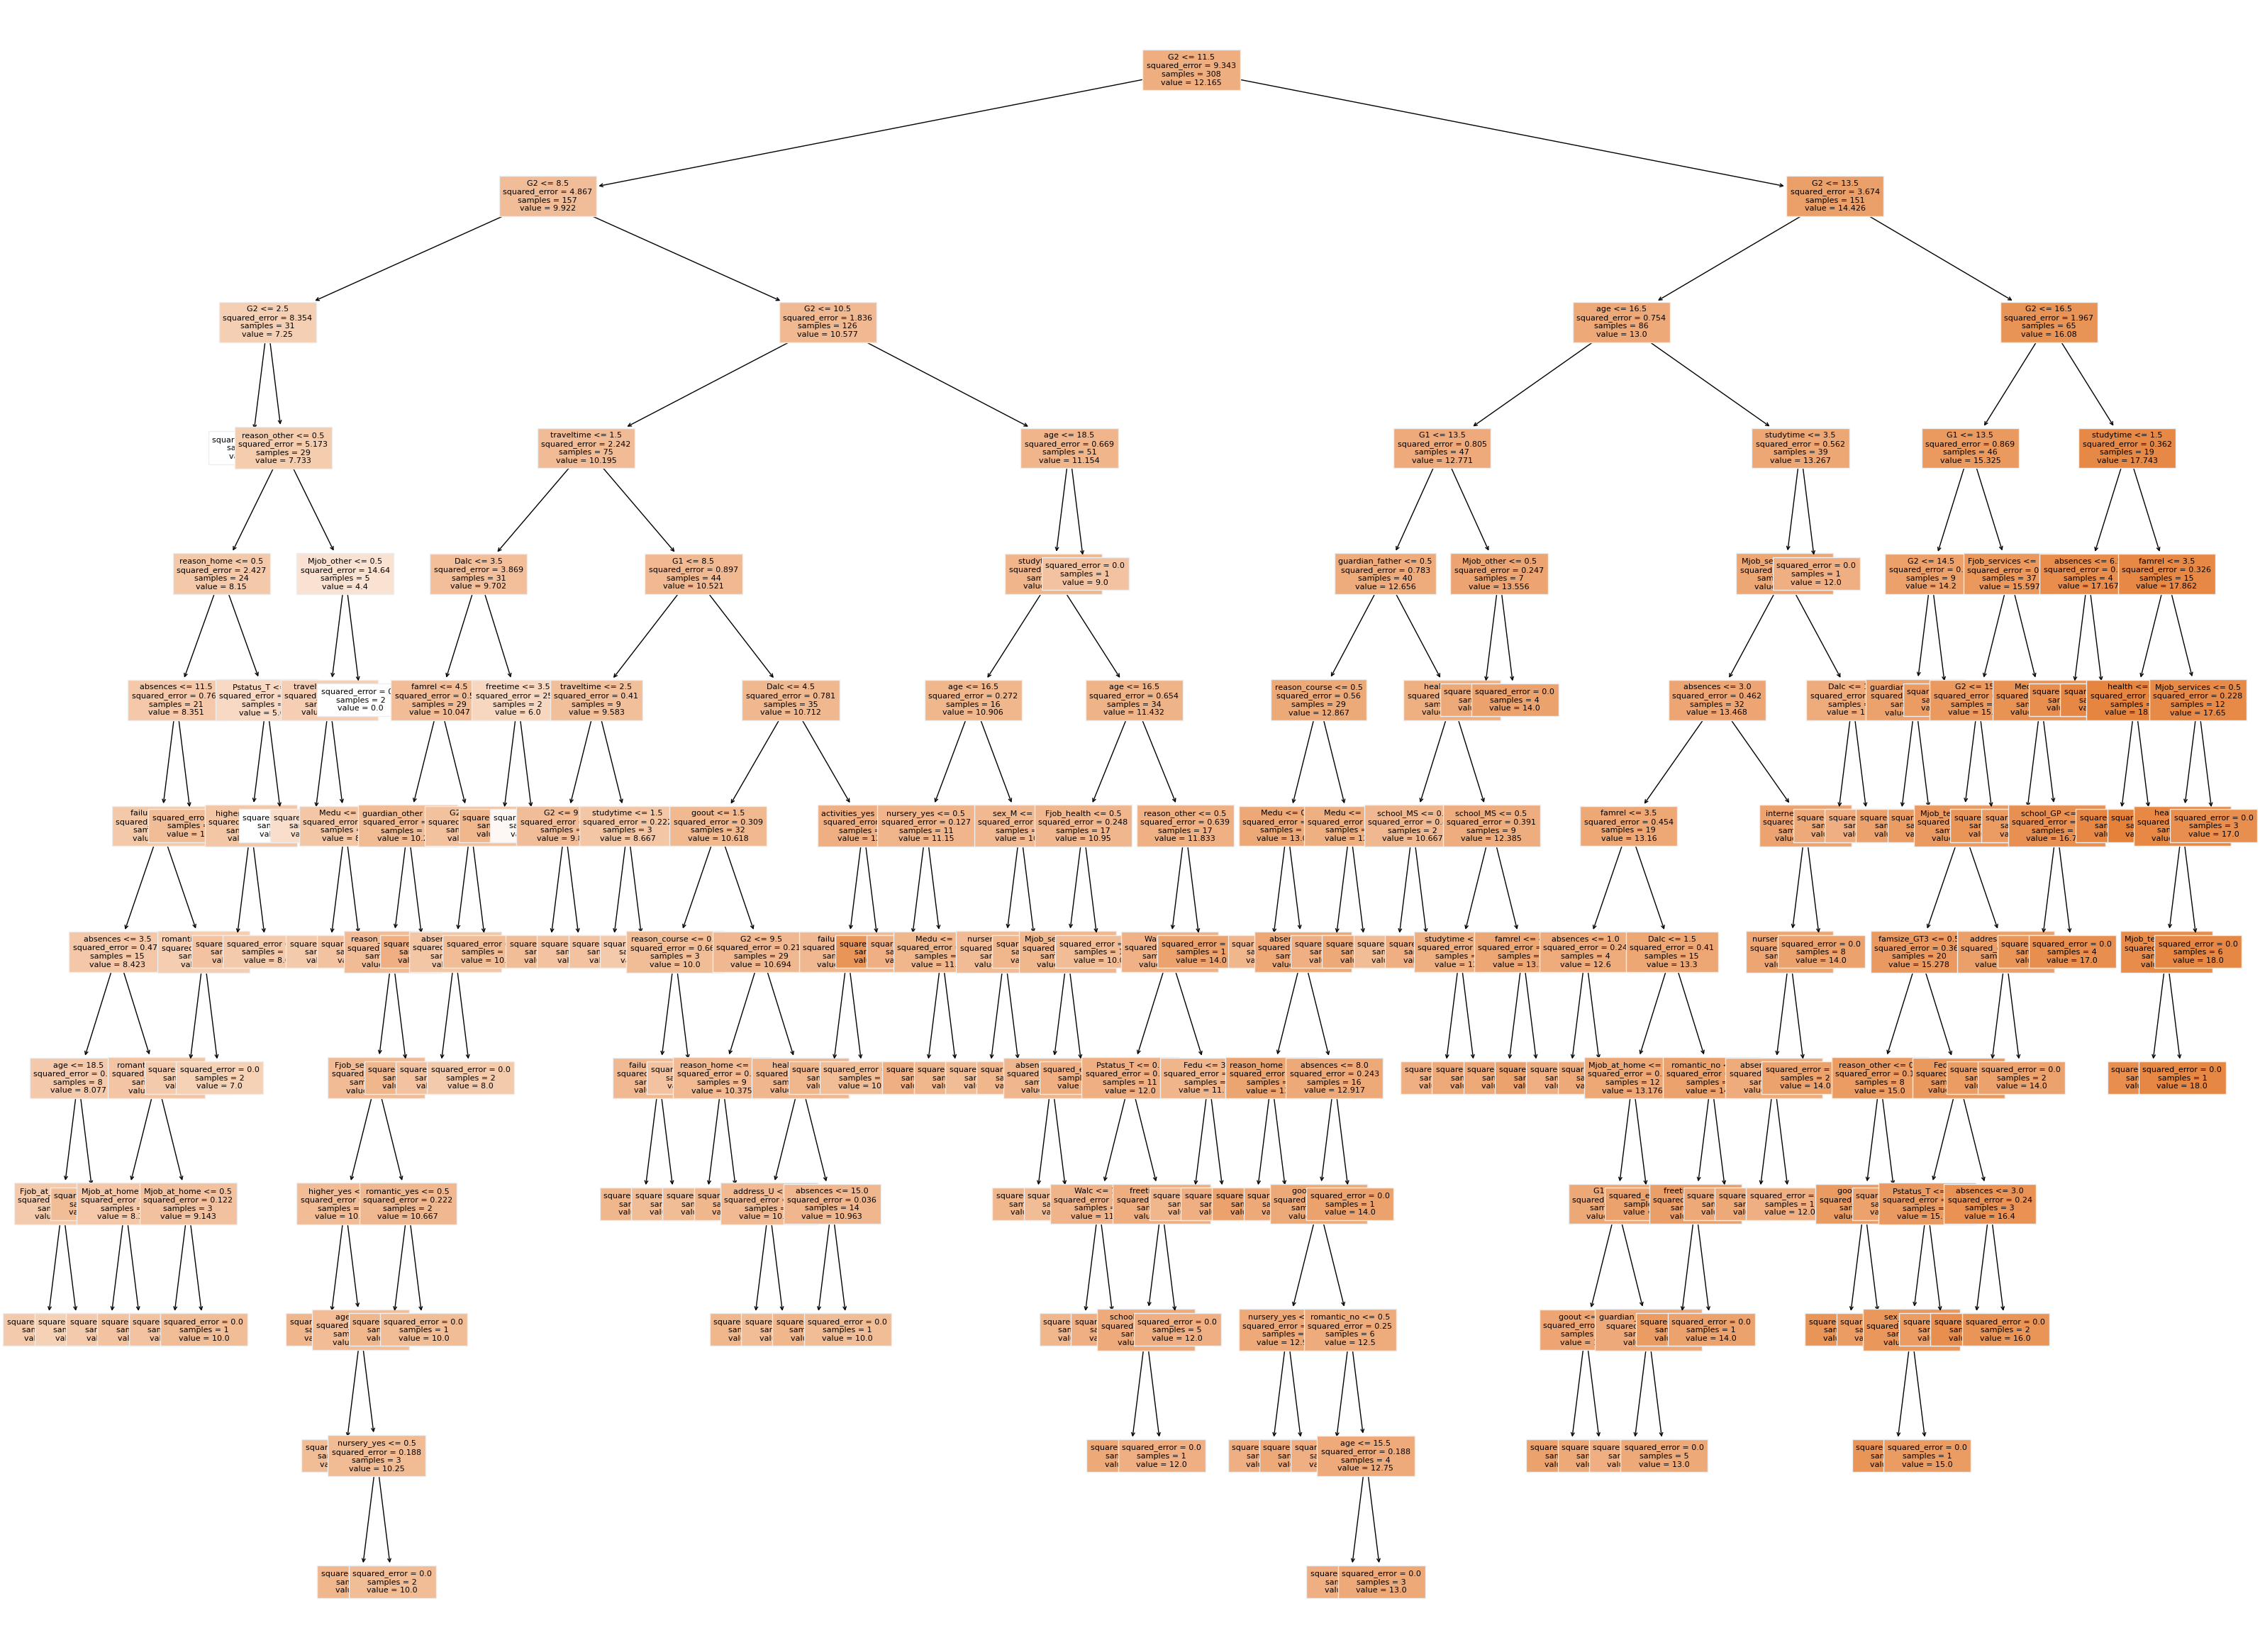

In [57]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, filled=True, feature_names=feature_names,ax=ax, fontsize=8);


In [58]:
fig.savefig('example_tree.png',dpi=300)


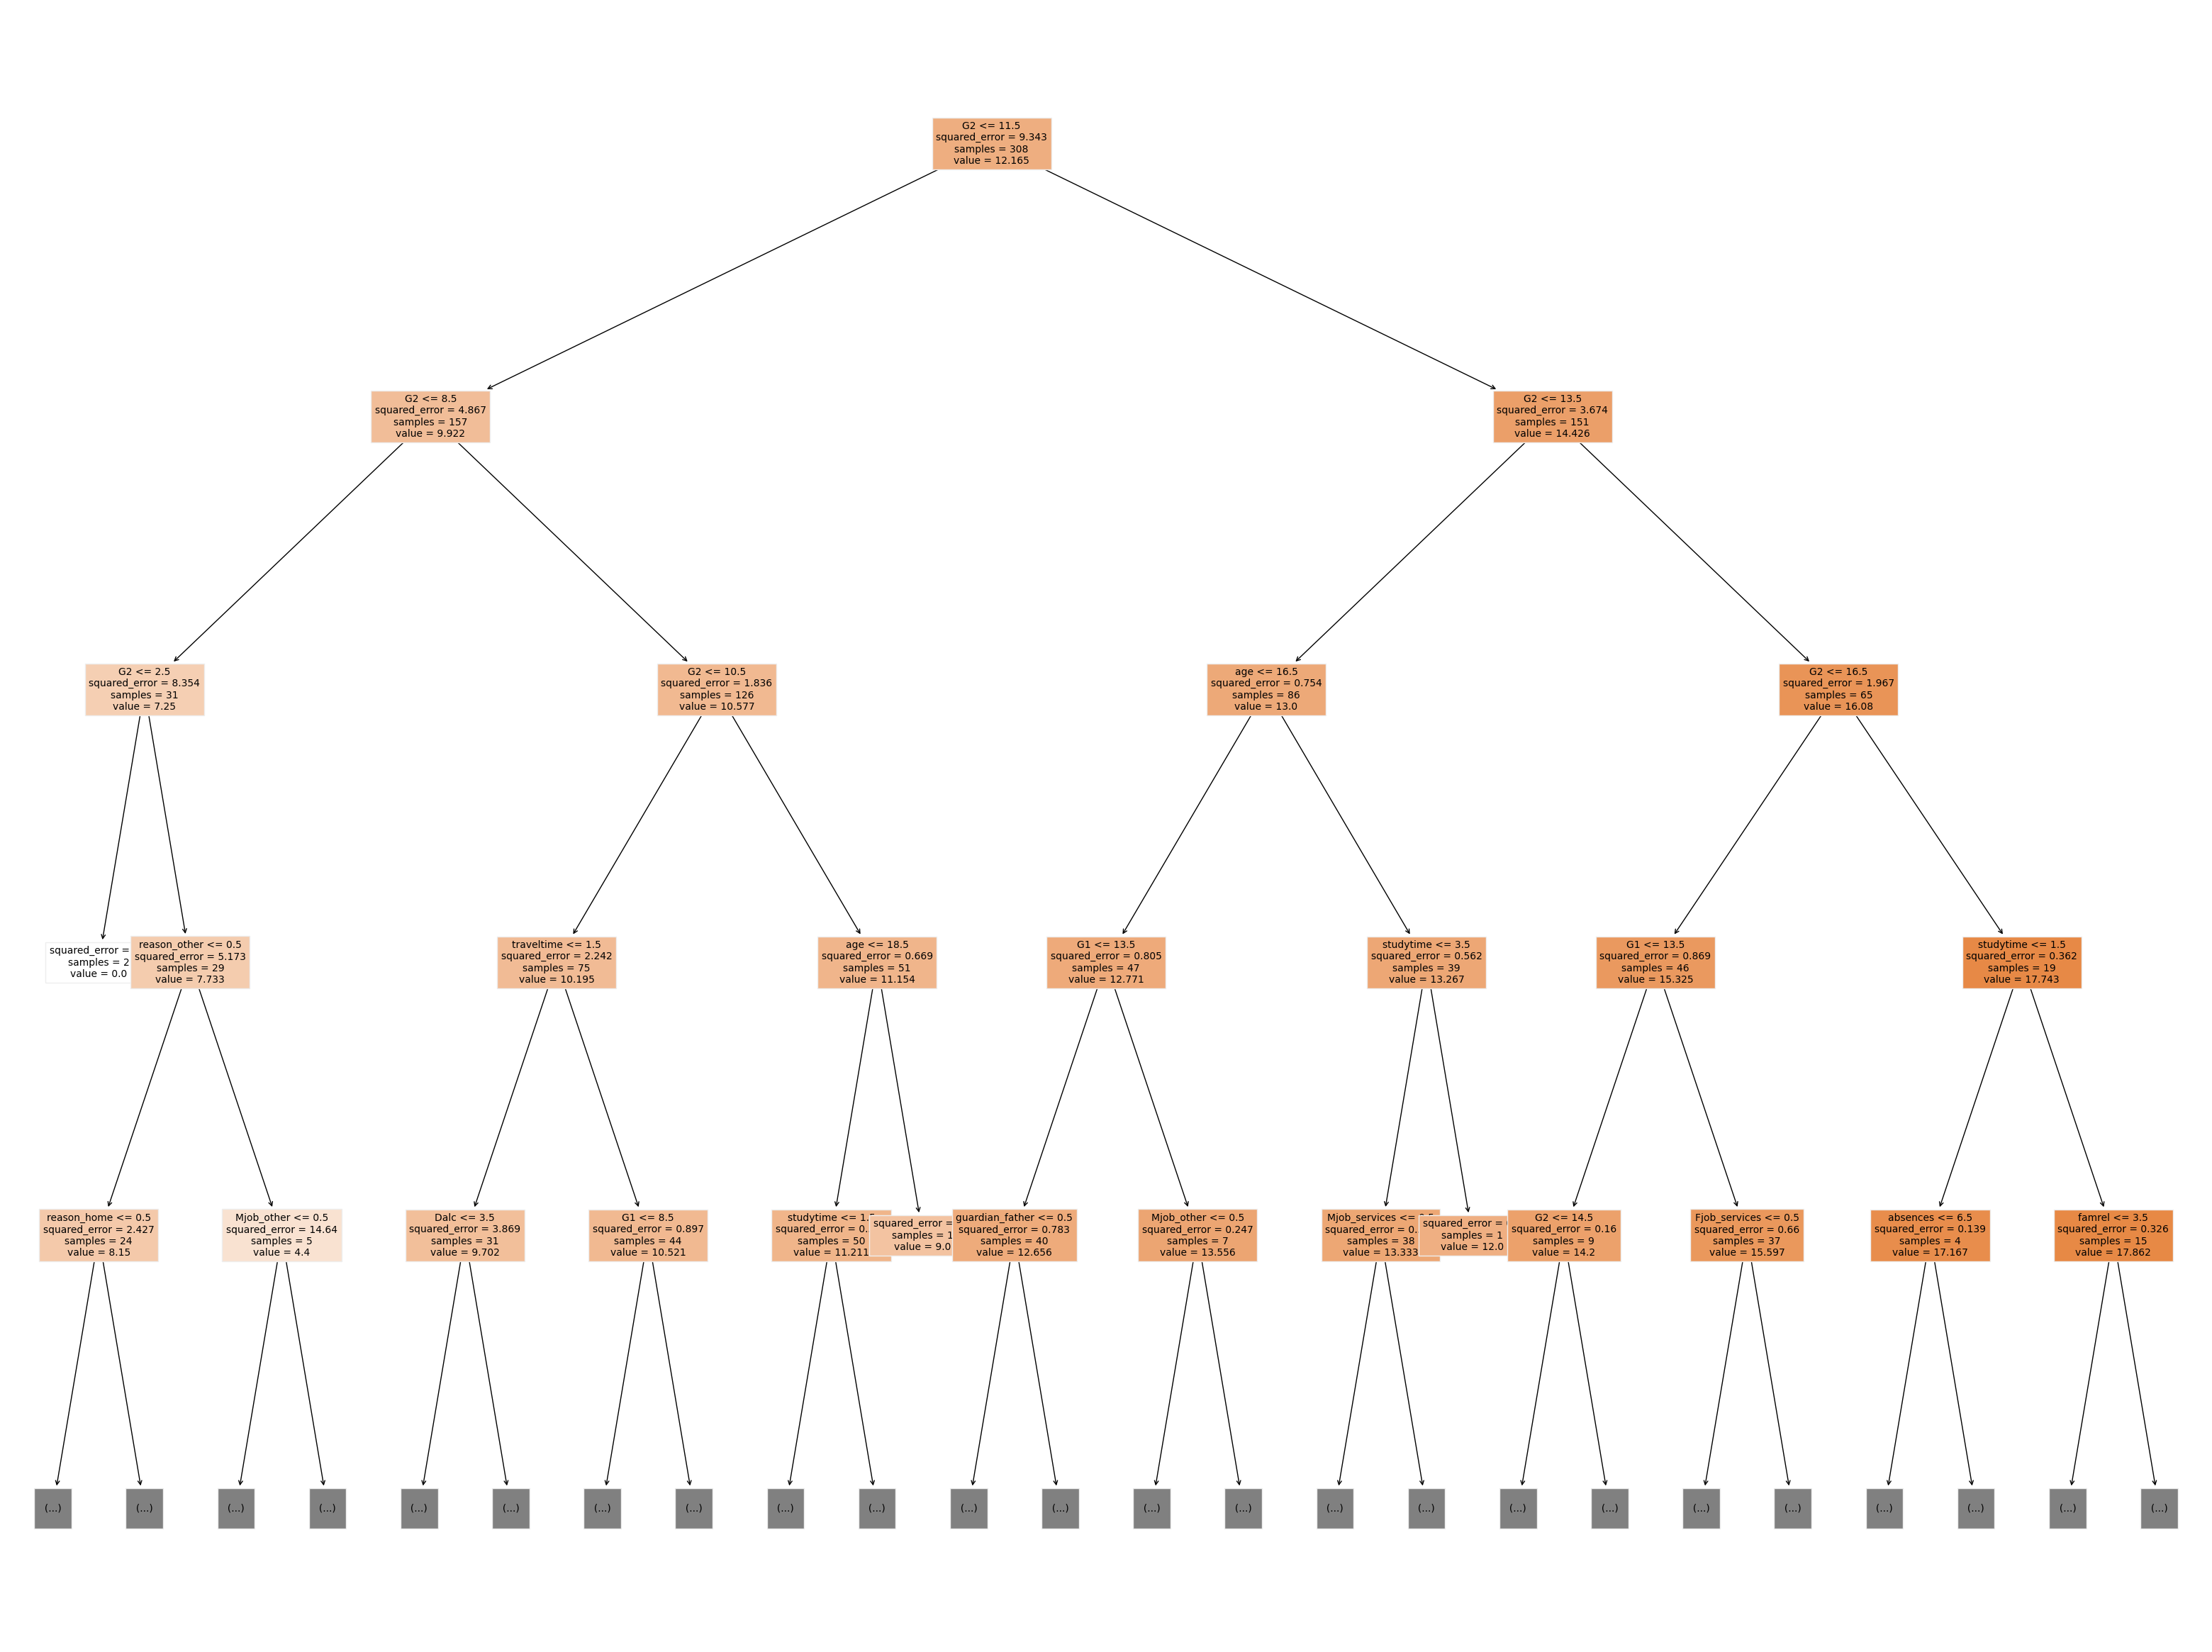

In [59]:
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, max_depth=4,filled=True,feature_names=feature_names,ax=ax,
         fontsize=10);


In [60]:
## Drop the G1 and G2 features from the x vars
drop_cols = ['G1','G2']
X_train_B = X_train_df.drop(columns=drop_cols)
X_test_B = X_test_df.drop(columns=drop_cols)
feature_names_B = X_train_B.columns
X_train_B.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
54   15.0   3.0   3.0         1.0        1.0       0.0     5.0       3.0   
208  16.0   2.0   3.0         2.0        1.0       0.0     5.0       3.0   
23   16.0   2.0   2.0         2.0        2.0       0.0     5.0       4.0   

     goout  Dalc  Walc  health  absences  school_GP  school_MS  sex_F  sex_M  \
54     4.0   4.0   4.0     1.0       0.0        1.0        0.0    1.0    0.0   
208    3.0   1.0   1.0     3.0       0.0        1.0        0.0    0.0    1.0   
23     4.0   2.0   4.0     5.0       2.0        1.0        0.0    0.0    1.0   

     address_R  address_U  famsize_GT3  famsize_LE3  Pstatus_A  Pstatus_T  \
54         0.0        1.0          0.0          1.0        1.0        0.0   
208        0.0        1.0          1.0          0.0        0.0        1.0   
23         0.0        1.0          0.0          1.0        0.0        1.0   

     Mjob_at_home  Mjob_health  ...  Fjob_services  Fjob_teacher  \
54            0.0          0.0  ...            0.0           0.0   
208           0.0          0.0  ...            0.0           0.0   
23            0.0          0.0  ...            0.0           0.0   

     reason_course  reason_home  reason_other  reason_reputation  \
54             0.0          0.0           1.0                0.0   
208            0.0          1.0           0.0                0.0   
23             0.0          0.0           0.0                1.0   

     guardian_father  guardian_mother  guardian_other  schoolsup_no  \
54               0.0              1.0             0.0           1.0   
208              1.0              0.0             0.0           1.0   
23               0.0              1.0             0.0           1.0   

     schoolsup_yes  famsup_no  famsup_yes  paid_no  paid_yes  activities_no  \
54             0.0        1.0         0.0      1.0       0.0            1.0   
208            0.0        1.0         0.0      1.0       0.0            1.0   
23             0.0        0.0         1.0      1.0       0.0            0.0   

     activities_yes  nursery_no  nursery_yes  higher_no  higher_yes  \
54              0.0         0.0          1.0        0.0         1.0   
208             0.0         0.0          1.0        0.0         1.0   
23              1.0         0.0          1.0        0.0         1.0   

     internet_no  internet_yes  romantic_no  romantic_yes  
54           0.0           1.0          1.0           0.0  
208          0.0           1.0          1.0           0.0  
23           0.0           1.0          1.0           0.0  

[3 rows x 56 columns]

Training Data:	R^2= 0.89	RMSE= 1.08
Test Data:	R^2= 0.35	RMSE= 2.44


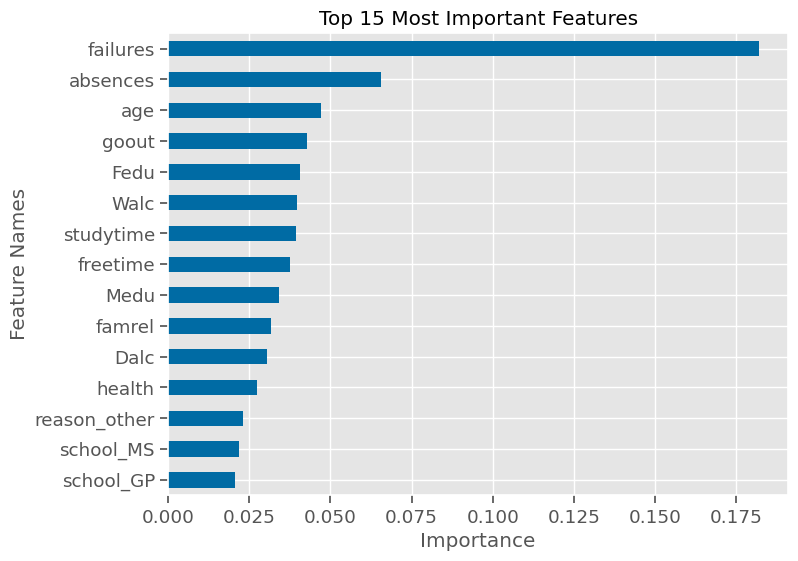

In [61]:
reg_B = RandomForestRegressor(random_state = SEED)
reg_B.fit(X_train_B, y_train)
evaluate_regression(reg_B, X_train_B, y_train, X_test_B,y_test)
## Saving the feature importances
importances = get_importances(reg_B, sort=True, ascending=False)
plot_importance(importances, top_n=15);


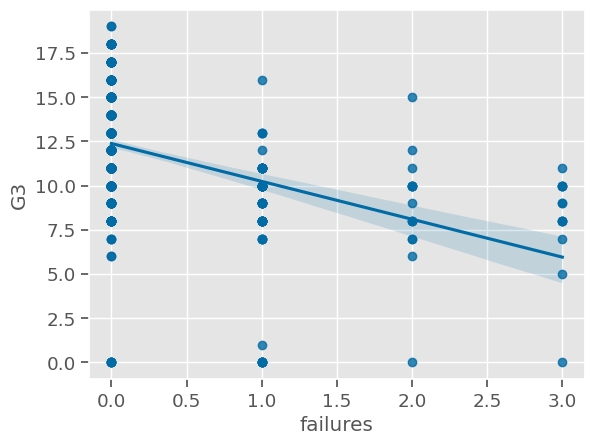

In [62]:
sns.regplot(data=plot_df, x='failures',y='G3');

## Permutation Importance

In [63]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg_B, X_test_B, y_test,n_repeats =5, random_state = SEED)
r.keys()


dict_keys(['importances_mean', 'importances_std', 'importances'])

In [64]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_B.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances


failures             0.357428
studytime            0.045001
absences             0.035727
Dalc                 0.024777
goout                0.020265
age                  0.019417
health               0.017610
Medu                 0.015610
higher_no            0.014927
higher_yes           0.012659
freetime             0.011334
Walc                 0.006975
famsup_yes           0.006587
famrel               0.006560
traveltime           0.006131
sex_M                0.005797
sex_F                0.005625
reason_other         0.004892
famsup_no            0.004291
activities_yes       0.004070
Mjob_health          0.003454
address_U            0.003346
schoolsup_yes        0.003174
guardian_mother      0.002712
schoolsup_no         0.002369
romantic_no          0.001837
Pstatus_T            0.001315
address_R            0.001179
Pstatus_A            0.000902
nursery_yes          0.000658
guardian_father      0.000655
Mjob_teacher         0.000377
guardian_other       0.000272
activities

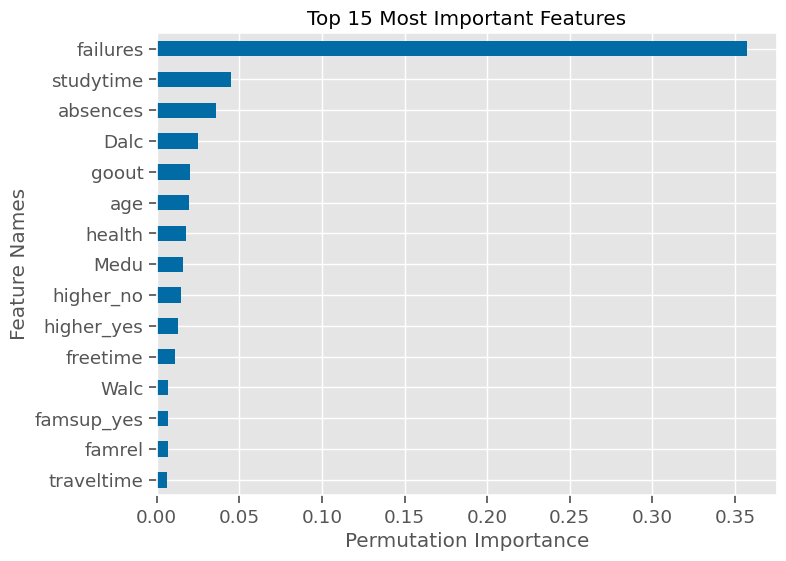

In [65]:
ax = plot_importance(permutation_importances,top_n=15)
ax.set(xlabel='Permutation Importance');

In [66]:
## color -coding top 5 bars
highlight_feats = importances.sort_values(ascending=True).tail(5).index
highlight_feats


Index(['Fedu', 'goout', 'age', 'absences', 'failures'], dtype='object')

In [67]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'
    else:
        colors_dict[col] = '#006ba4'
colors_dict


{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': '#006ba4',
 'studytime': '#006ba4',
 'freetime': '#006ba4',
 'Medu': '#006ba4',
 'famrel': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_MS': '#006ba4',
 'school_GP': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_home': '#006ba4',
 'schoolsup_no': '#006ba4',
 'reason_reputation': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'famsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'activities_yes': '#006ba4',
 'Mjob_other': '#006ba4',
 'reason_course': '#006ba4',
 'famsup_yes': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_no': '#006ba4',
 'famsize_LE3': '#006ba4',
 'sex_F': '#006ba4',
 'Mjob_services': '#006ba4',
 'romantic_no': '#006ba4',
 'guardian_mother': '#006ba4',
 'nursery_yes': '

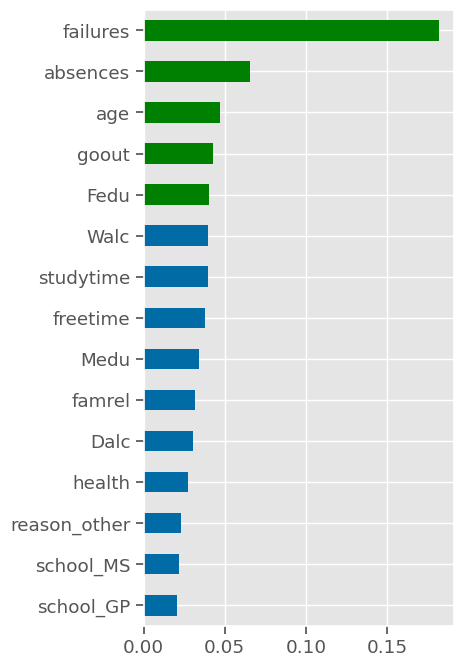

In [68]:
plot_vals = importances.sort_values().tail(15)
plot_vals.plot(kind='barh', color=plot_vals.index.map(colors_dict), figsize=(4,8));

In [69]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict


In [70]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7


{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': 'green',
 'studytime': 'green',
 'freetime': '#006ba4',
 'Medu': '#006ba4',
 'famrel': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_MS': '#006ba4',
 'school_GP': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_home': '#006ba4',
 'schoolsup_no': '#006ba4',
 'reason_reputation': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'famsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'activities_yes': '#006ba4',
 'Mjob_other': '#006ba4',
 'reason_course': '#006ba4',
 'famsup_yes': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_no': '#006ba4',
 'famsize_LE3': '#006ba4',
 'sex_F': '#006ba4',
 'Mjob_services': '#006ba4',
 'romantic_no': '#006ba4',
 'guardian_mother': '#006ba4',
 'nursery_yes': '#006

In [71]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

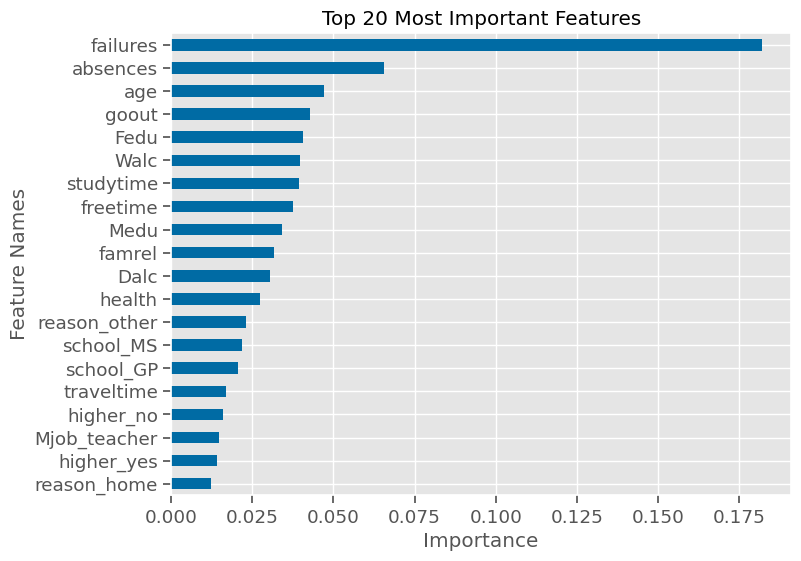

In [72]:
plot_importance_color(importances, color_dict=None,top_n=20);

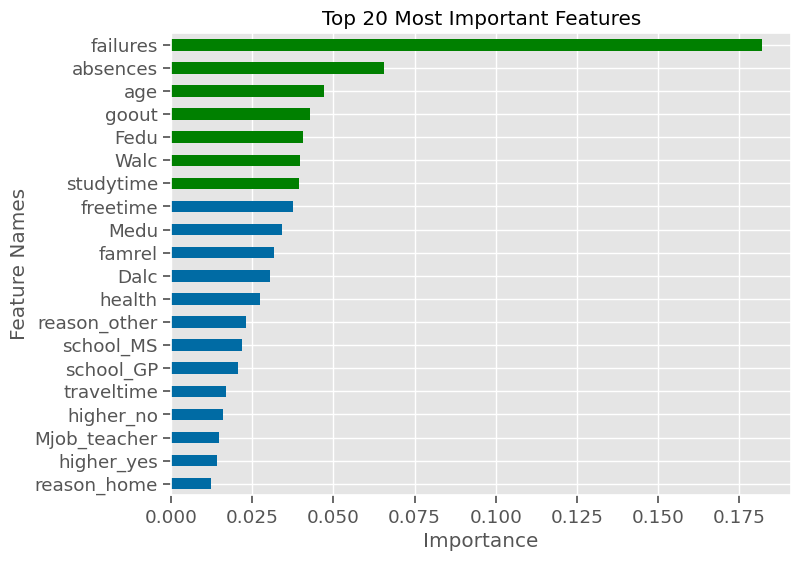

In [73]:
plot_importance_color(importances, color_dict=colors_top7,top_n=20);


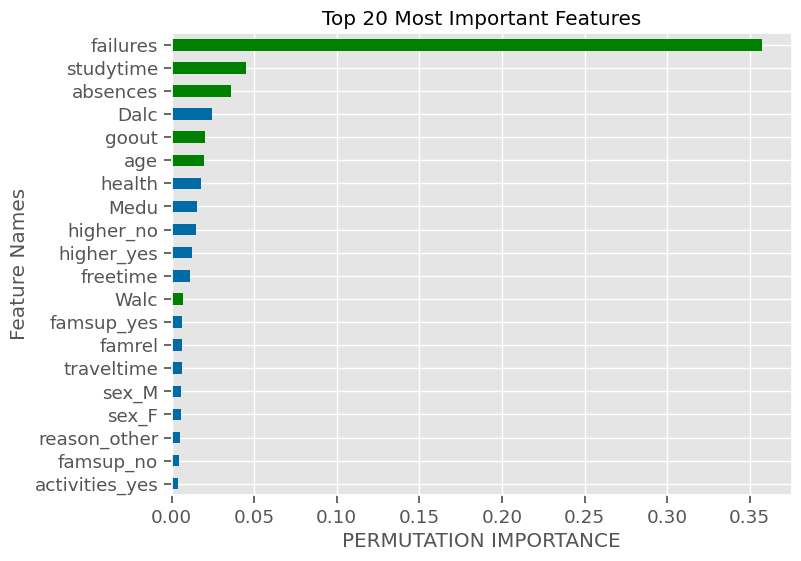

In [74]:
ax = plot_importance_color(permutation_importances,color_dict=colors_top7,top_n=20);
ax.set_xlabel("PERMUTATION IMPORTANCE");

In [75]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

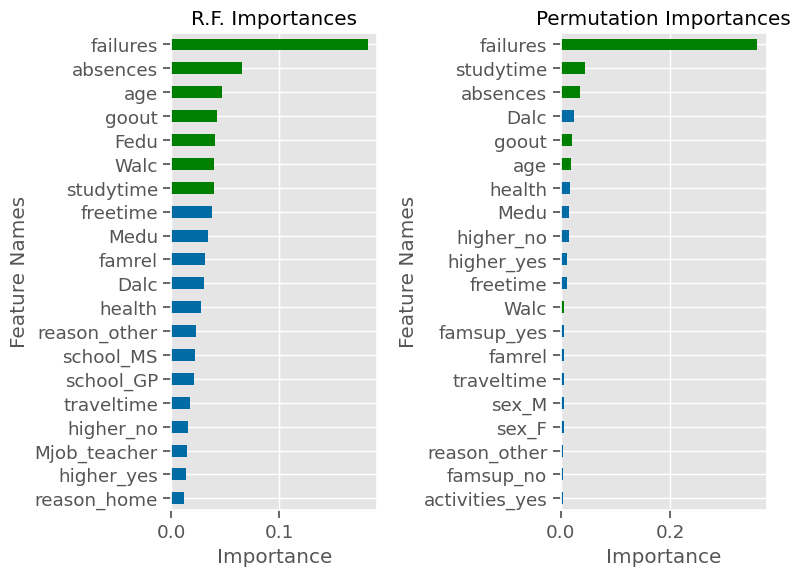

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()

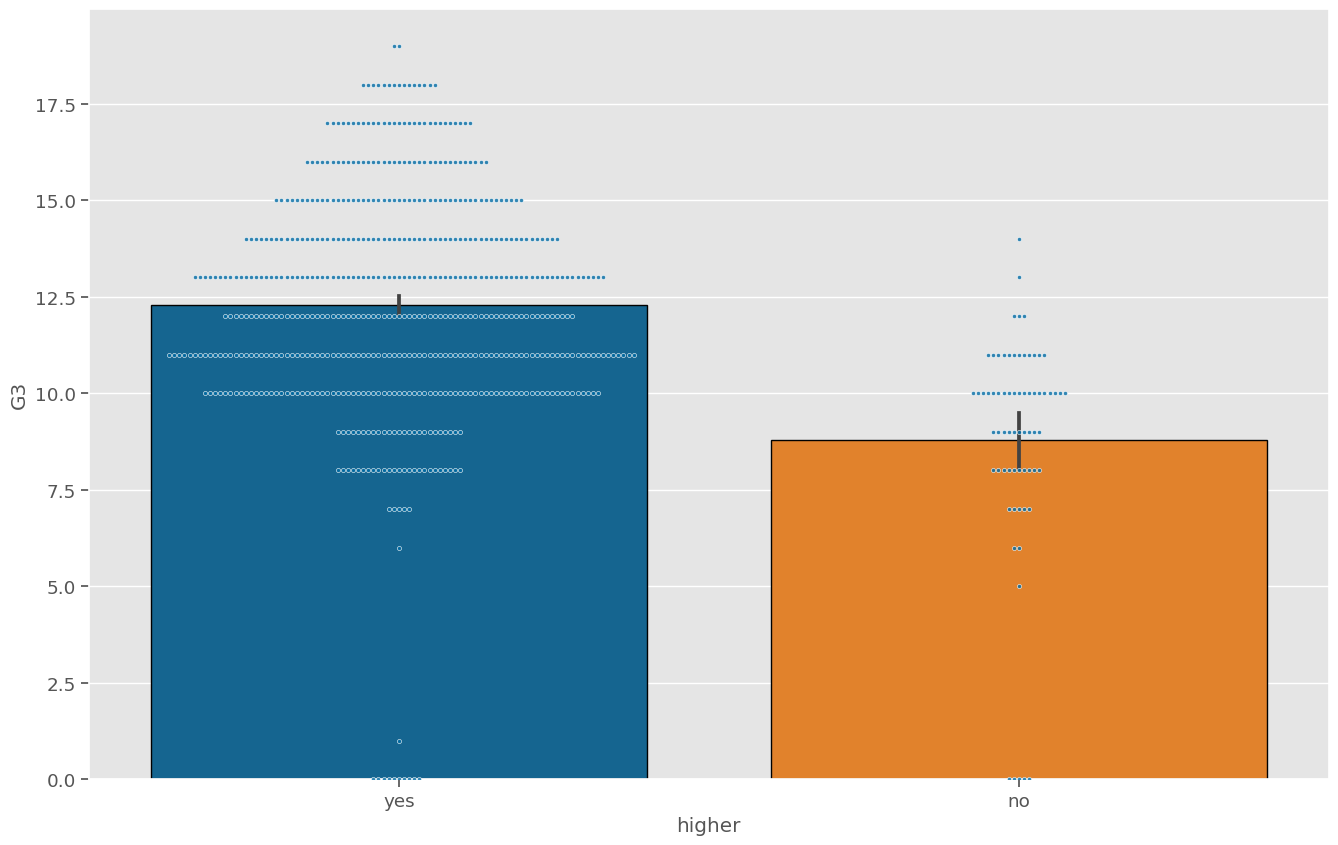

In [77]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=df, x='higher',y='G3',size=3,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=df, x='higher',y='G3',edgecolor='black',
            linewidth=1);


## Colormatching

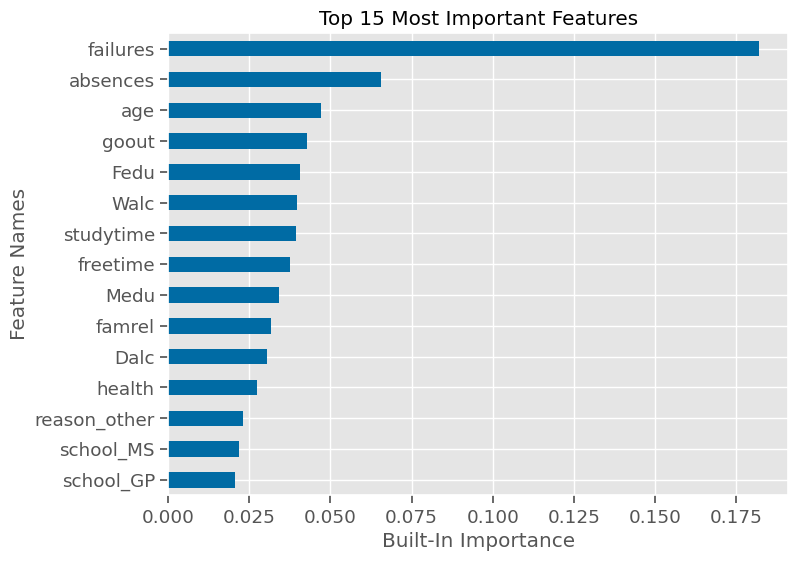

In [78]:
ax = plot_importance(importances,top_n=15)
ax.set(xlabel='Built-In Importance');

In [79]:
ax.containers


[<BarContainer object of 15 artists>]

In [80]:
## get the bar container
bars = ax.containers[0]
bars


<BarContainer object of 15 artists>

In [81]:
bar = bars[0]
bar


In [82]:
bar_color = bar.get_facecolor()
bar_color


(0.0, 0.4196078431372549, 0.6431372549019608, 1.0)

In [83]:
## Dict comprehension way - testing using RGBA color
colors_dict = {col:'green' if col in highlight_feats else bar_color for col in importances.index}
colors_dict


{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'studytime': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'freetime': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'Medu': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'famrel': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'Dalc': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'health': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'reason_other': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'school_MS': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'school_GP': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'traveltime': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'higher_no': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'Mjob_teacher': (0.0, 0.4196078431372549, 0.6431372549019608, 1.0),
 'higher_yes': (0.0, 0.4196078431372549, 0.6431372549019608

In [84]:
# ## this will error!
# try:
#     plot_vals = importances.sort_values().tail(15)
#     plot_vals.plot(kind='barh',color=plot_vals.index.map(colors_dict), figsize=(4,8))
# except Exception as e:
#     print('ERROR: ', e)

In [85]:
import matplotlib as mpl
#https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors
bar_color_hex = mpl.colors.rgb2hex(bar_color)
bar_color_hex


'#006ba4'

## Linear Regression Coefficients Revisited

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_B, y_train)
evaluate_regression(lin_reg, X_train_B, y_train, X_test_B,y_test)

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [88]:
lin_reg.coef_


array([ 1.76860834e-01,  8.74525445e-02,  2.12990079e-01,  2.50273476e-01,
        4.62538094e-01, -1.29449420e+00,  1.58423550e-01, -2.34591600e-01,
        5.19820287e-03, -2.12618302e-01, -7.13522620e-02, -1.23016460e-01,
       -2.93315717e-02,  3.17005484e+11,  3.17005484e+11, -4.39908140e+11,
       -4.39908140e+11,  6.28803910e+10,  6.28803910e+10,  1.95811792e+09,
        1.95811792e+09,  1.26758804e+11,  1.26758804e+11, -1.63845424e+11,
       -1.63845424e+11, -1.63845424e+11, -1.63845424e+11, -1.63845424e+11,
        2.68965465e+11,  2.68965465e+11,  2.68965465e+11,  2.68965465e+11,
        2.68965465e+11,  7.57096214e+11,  7.57096214e+11,  7.57096214e+11,
        7.57096214e+11,  7.12126556e+10,  7.12126556e+10,  7.12126556e+10,
       -6.06944580e+11, -6.06944580e+11,  4.24882783e+10,  4.24882783e+10,
        4.03939964e+11,  4.03939964e+11,  1.90835979e+11,  1.90835979e+11,
        4.44860972e+10,  4.44860972e+10,  4.43346990e+11,  4.43346990e+11,
       -3.11908824e+11, -

In [89]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names_B)


56


56

In [90]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names_B)
coeffs


age                  1.768608e-01
Medu                 8.745254e-02
Fedu                 2.129901e-01
traveltime           2.502735e-01
studytime            4.625381e-01
failures            -1.294494e+00
famrel               1.584236e-01
freetime            -2.345916e-01
goout                5.198203e-03
Dalc                -2.126183e-01
Walc                -7.135226e-02
health              -1.230165e-01
absences            -2.933157e-02
school_GP            3.170055e+11
school_MS            3.170055e+11
sex_F               -4.399081e+11
sex_M               -4.399081e+11
address_R            6.288039e+10
address_U            6.288039e+10
famsize_GT3          1.958118e+09
famsize_LE3          1.958118e+09
Pstatus_A            1.267588e+11
Pstatus_T            1.267588e+11
Mjob_at_home        -1.638454e+11
Mjob_health         -1.638454e+11
Mjob_other          -1.638454e+11
Mjob_services       -1.638454e+11
Mjob_teacher        -1.638454e+11
Fjob_at_home         2.689655e+11
Fjob_health   

In [91]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

age                  1.768608e-01
Medu                 8.745254e-02
Fedu                 2.129901e-01
traveltime           2.502735e-01
studytime            4.625381e-01
failures            -1.294494e+00
famrel               1.584236e-01
freetime            -2.345916e-01
goout                5.198203e-03
Dalc                -2.126183e-01
Walc                -7.135226e-02
health              -1.230165e-01
absences            -2.933157e-02
school_GP            3.170055e+11
school_MS            3.170055e+11
sex_F               -4.399081e+11
sex_M               -4.399081e+11
address_R            6.288039e+10
address_U            6.288039e+10
famsize_GT3          1.958118e+09
famsize_LE3          1.958118e+09
Pstatus_A            1.267588e+11
Pstatus_T            1.267588e+11
Mjob_at_home        -1.638454e+11
Mjob_health         -1.638454e+11
Mjob_other          -1.638454e+11
Mjob_services       -1.638454e+11
Mjob_teacher        -1.638454e+11
Fjob_at_home         2.689655e+11
Fjob_health   

In [92]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs


age                                  0.18
Medu                                 0.09
Fedu                                 0.21
traveltime                           0.25
studytime                            0.46
failures                            -1.29
famrel                               0.16
freetime                            -0.23
goout                                0.01
Dalc                                -0.21
Walc                                -0.07
health                              -0.12
absences                            -0.03
school_GP              317,005,483,727.18
school_MS              317,005,483,725.72
sex_F                 -439,908,140,412.09
sex_M                 -439,908,140,412.75
address_R               62,880,391,009.30
address_U               62,880,391,009.53
famsize_GT3              1,958,117,918.82
famsize_LE3              1,958,117,919.31
Pstatus_A              126,758,804,061.83
Pstatus_T              126,758,804,062.10
Mjob_at_home          -163,845,423

In [93]:
df.select_dtypes('object').nunique()


school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [94]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G1', 'G2', 'G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)


In [95]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
104 15.00  3.00  4.00        1.00       2.00      0.00    5.00      4.00   
284 18.00  2.00  1.00        1.00       1.00      2.00    3.00      2.00   
579 18.00  1.00  3.00        1.00       1.00      0.00    4.00      3.00   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
104   4.00  1.00  1.00    1.00      0.00       0.00   1.00       1.00   
284   5.00  2.00  5.00    5.00      4.00       0.00   1.00       1.00   
579   3.00  2.00  3.00    3.00      0.00       1.00   1.00       1.00   

     famsize_LE3  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
104         0.00       0.00          0.00         0.00        0.00   
284         0.00       1.00          0.00         0.00        0.00   
579         1.00       1.00          1.00         0.00        0.00   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
104           1.00          0.00          0.00         0.00        1.00   
284           1.00          0.00          0.00         0.00        0.00   
579           0.00          0.00          0.00         0.00        0.00   

     Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
104           0.00          0.00           1.00         0.00          0.00   
284           1.00          0.00           0.00         0.00          1.00   
579           1.00          0.00           1.00         0.00          0.00   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
104               0.00             0.00             1.00            0.00   
284               0.00             0.00             1.00            0.00   
579               0.00             0.00             1.00            0.00   

     schoolsup_yes  famsup_yes  paid_yes  activities_yes  nursery_yes  \
104           0.00        1.00      0.00            1.00         1.00   
284           0.00        0.00      0.00            0.00         0.00   
579           0.00        0.00      0.00            0.00         1.00   

     higher_yes  internet_yes  romantic_yes  
104        1.00          1.00          0.00  
284        0.00          1.00          0.00  
579        0.00          1.00          1.00

In [96]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.44


In [97]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs['intercept'] = lin_reg.intercept_
coeffs


age                                  0.18
Medu                                 0.09
Fedu                                 0.21
traveltime                           0.25
studytime                            0.46
failures                            -1.29
famrel                               0.16
freetime                            -0.24
goout                                0.01
Dalc                                -0.21
Walc                                -0.07
health                              -0.12
absences                            -0.03
school_MS                           -1.46
sex_M                               -0.66
address_U                            0.23
famsize_LE3                          0.49
Pstatus_T                            0.28
Mjob_at_home          -501,608,201,379.85
Mjob_health           -501,608,201,378.93
Mjob_other            -501,608,201,379.75
Mjob_services         -501,608,201,379.50
Mjob_teacher          -501,608,201,379.60
Fjob_at_home          -425,903,076

In [98]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G1', 'G2', 'G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
54      GP   F   15       U     LE3       A     3     3    other     other   
208     GP   M   16       U     GT3       T     2     3    other     other   
23      GP   M   16       U     LE3       T     2     2    other     other   
547     MS   M   16       R     LE3       T     4     1    other   at_home   
604     MS   F   18       U     GT3       T     1     1  at_home  services   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
54        other   mother           1          1         0        no     no   
208        home   father           2          1         0        no     no   
23   reputation   mother           2          2         0        no    yes   
547       other   father           1          1         0        no     no   
604      course   mother           3          2         1        no     no   

    paid activities nursery higher internet romantic  famrel  freetime  goout  \
54    no         no     yes    yes      yes       no       5         3      4   
208   no         no     yes    yes      yes       no       5         3      3   
23    no        yes     yes    yes      yes       no       5         4      4   
547   no         no     yes    yes      yes       no       4         1      2   
604   no         no     yes     no       no       no       4         4      2   

     Dalc  Walc  health  absences  
54      4     4       1         0  
208     1     1       3         0  
23      2     4       5         2  
547     2     1       2         0  
604     1     2       2         2

In [99]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='first', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
104 15.00  3.00  4.00        1.00       2.00      0.00    5.00      4.00   
284 18.00  2.00  1.00        1.00       1.00      2.00    3.00      2.00   
579 18.00  1.00  3.00        1.00       1.00      0.00    4.00      3.00   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
104   4.00  1.00  1.00    1.00      0.00       0.00   1.00       1.00   
284   5.00  2.00  5.00    5.00      4.00       0.00   1.00       1.00   
579   3.00  2.00  3.00    3.00      0.00       1.00   1.00       1.00   

     famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  Mjob_services  \
104         0.00       0.00         0.00        0.00           1.00   
284         0.00       1.00         0.00        0.00           1.00   
579         1.00       1.00         0.00        0.00           0.00   

     Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
104          0.00         0.00        1.00           0.00          0.00   
284          0.00         0.00        0.00           1.00          0.00   
579          0.00         0.00        0.00           1.00          0.00   

     reason_home  reason_other  reason_reputation  guardian_mother  \
104         0.00          0.00               0.00             1.00   
284         0.00          1.00               0.00             1.00   
579         0.00          0.00               0.00             1.00   

     guardian_other  schoolsup_yes  famsup_yes  paid_yes  activities_yes  \
104            0.00           0.00        1.00      0.00            1.00   
284            0.00           0.00        0.00      0.00            0.00   
579            0.00           0.00        0.00      0.00            0.00   

     nursery_yes  higher_yes  internet_yes  romantic_yes  
104         1.00        1.00          1.00          0.00  
284         0.00        0.00          1.00          0.00  
579         1.00        0.00          1.00          1.00

In [100]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [101]:
# Tip: sklearn models now store the feature names in .feature_names_in_!
lin_reg.feature_names_in_


array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'], dtype=object)

In [102]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
coeffs['intercept'] = lin_reg.intercept_
coeffs


age                  0.18
Medu                 0.09
Fedu                 0.21
traveltime           0.25
studytime            0.46
failures            -1.29
famrel               0.16
freetime            -0.23
goout                0.01
Dalc                -0.21
Walc                -0.07
health              -0.12
absences            -0.03
school_MS           -1.46
sex_M               -0.66
address_U            0.23
famsize_LE3          0.49
Pstatus_T            0.27
Mjob_health          0.92
Mjob_other           0.10
Mjob_services        0.36
Mjob_teacher         0.25
Fjob_health         -1.16
Fjob_other          -0.38
Fjob_services       -0.81
Fjob_teacher         0.95
reason_home          0.12
reason_other        -0.22
reason_reputation   -0.07
guardian_mother     -0.38
guardian_other      -0.03
schoolsup_yes       -1.31
famsup_yes          -0.01
paid_yes            -0.48
activities_yes       0.29
nursery_yes         -0.40
higher_yes           1.69
internet_yes         0.30
romantic_yes

In [103]:
## using our cat_sel to get the list of categorical features
cat_sel(X)


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [104]:
for col in cat_sel(X):
    print(f"For {col}:\n{X[col].unique()}\n")


For school:
['GP' 'MS']

For sex:
['F' 'M']

For address:
['U' 'R']

For famsize:
['GT3' 'LE3']

For Pstatus:
['A' 'T']

For Mjob:
['at_home' 'health' 'other' 'services' 'teacher']

For Fjob:
['teacher' 'other' 'services' 'health' 'at_home']

For reason:
['course' 'other' 'home' 'reputation']

For guardian:
['mother' 'father' 'other']

For schoolsup:
['yes' 'no']

For famsup:
['no' 'yes']

For paid:
['no' 'yes']

For activities:
['no' 'yes']

For nursery:
['yes' 'no']

For higher:
['yes' 'no']

For internet:
['no' 'yes']

For romantic:
['no' 'yes']



In [105]:
drop_cats = ['GP', 'M', 'R', 'LE3', 'A', 'other', 'other', 'other',
              'other', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [106]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop=drop_cats, sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
104 15.00  3.00  4.00        1.00       2.00      0.00    5.00      4.00   
284 18.00  2.00  1.00        1.00       1.00      2.00    3.00      2.00   
579 18.00  1.00  3.00        1.00       1.00      0.00    4.00      3.00   

     goout  Dalc  Walc  health  absences  school_MS  sex_F  address_U  \
104   4.00  1.00  1.00    1.00      0.00       0.00   0.00       1.00   
284   5.00  2.00  5.00    5.00      4.00       0.00   0.00       1.00   
579   3.00  2.00  3.00    3.00      0.00       1.00   0.00       1.00   

     famsize_GT3  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_services  \
104         1.00       0.00          0.00         0.00           1.00   
284         1.00       1.00          0.00         0.00           1.00   
579         0.00       1.00          1.00         0.00           0.00   

     Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_services  Fjob_teacher  \
104          0.00          0.00         0.00           0.00          0.00   
284          0.00          0.00         0.00           1.00          0.00   
579          0.00          0.00         0.00           1.00          0.00   

     reason_course  reason_home  reason_reputation  guardian_father  \
104           1.00         0.00               0.00             0.00   
284           0.00         0.00               0.00             0.00   
579           1.00         0.00               0.00             0.00   

     guardian_mother  schoolsup_yes  famsup_yes  paid_yes  activities_yes  \
104             1.00           0.00        1.00      0.00            1.00   
284             1.00           0.00        0.00      0.00            0.00   
579             1.00           0.00        0.00      0.00            0.00   

     nursery_yes  higher_yes  internet_yes  romantic_yes  
104         1.00        1.00          1.00          0.00  
284         0.00        0.00          1.00          0.00  
579         1.00        0.00          1.00          1.00

In [107]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


In [108]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs


In [109]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs


school_MS           -1.46
schoolsup_yes       -1.31
failures            -1.29
Fjob_health         -0.77
famsize_GT3         -0.49
paid_yes            -0.48
Fjob_services       -0.42
romantic_yes        -0.42
nursery_yes         -0.40
guardian_mother     -0.35
freetime            -0.23
Dalc                -0.21
health              -0.12
Mjob_at_home        -0.10
Walc                -0.07
absences            -0.03
famsup_yes          -0.01
goout                0.01
guardian_father      0.03
Medu                 0.09
reason_reputation    0.14
Mjob_teacher         0.15
famrel               0.16
age                  0.18
Fedu                 0.21
reason_course        0.22
address_U            0.23
traveltime           0.25
Mjob_services        0.26
Pstatus_T            0.27
activities_yes       0.29
internet_yes         0.30
reason_home          0.33
Fjob_at_home         0.38
studytime            0.46
sex_F                0.66
Mjob_health          0.82
Fjob_teacher         1.33
higher_yes  

## Visualizing Coefficients

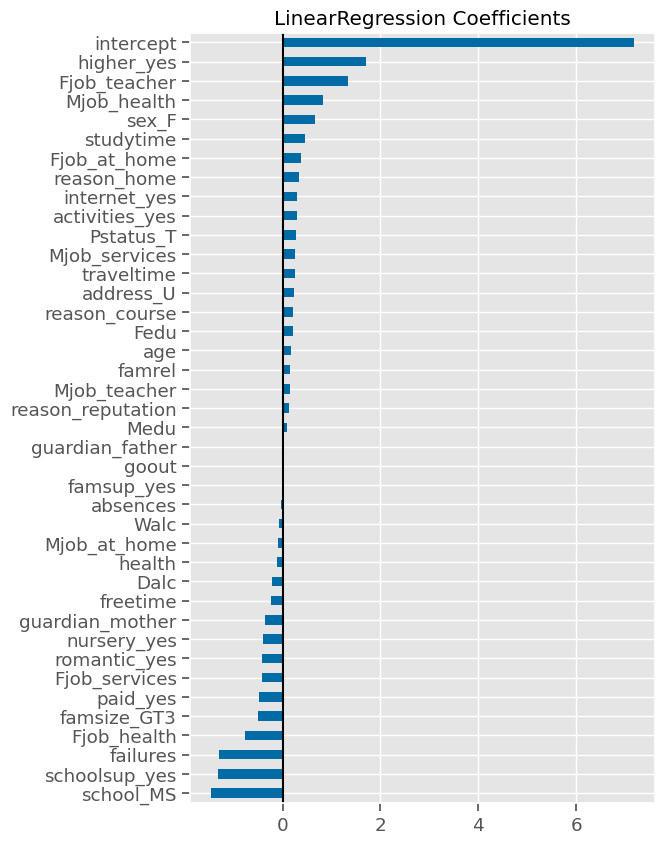

In [110]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');


In [111]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank


intercept           40.00
higher_yes          39.00
school_MS           38.00
Fjob_teacher        37.00
schoolsup_yes       36.00
failures            35.00
Mjob_health         34.00
Fjob_health         33.00
sex_F               32.00
famsize_GT3         31.00
paid_yes            30.00
studytime           29.00
Fjob_services       28.00
romantic_yes        27.00
nursery_yes         26.00
Fjob_at_home        25.00
guardian_mother     24.00
reason_home         23.00
internet_yes        22.00
activities_yes      21.00
Pstatus_T           20.00
Mjob_services       19.00
traveltime          18.00
freetime            17.00
address_U           16.00
reason_course       15.00
Fedu                14.00
Dalc                13.00
age                 12.00
famrel              11.00
Mjob_teacher        10.00
reason_reputation    9.00
health               8.00
Mjob_at_home         7.00
Medu                 6.00
Walc                 5.00
guardian_father      4.00
absences             3.00
famsup_yes  

In [112]:
top_n_features = coeff_rank.head(10)
top_n_features


intercept       40.00
higher_yes      39.00
school_MS       38.00
Fjob_teacher    37.00
schoolsup_yes   36.00
failures        35.00
Mjob_health     34.00
Fjob_health     33.00
sex_F           32.00
famsize_GT3     31.00
dtype: float64

In [113]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals


intercept        7.18
higher_yes       1.69
school_MS       -1.46
Fjob_teacher     1.33
schoolsup_yes   -1.31
failures        -1.29
Mjob_health      0.82
Fjob_health     -0.77
sex_F            0.66
famsize_GT3     -0.49
dtype: float64

In [114]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals


school_MS       -1.46
schoolsup_yes   -1.31
failures        -1.29
Fjob_health     -0.77
famsize_GT3     -0.49
paid_yes        -0.48
Fjob_services   -0.42
romantic_yes    -0.42
nursery_yes     -0.40
studytime        0.46
sex_F            0.66
Mjob_health      0.82
Fjob_teacher     1.33
higher_yes       1.69
intercept        7.18
dtype: float64

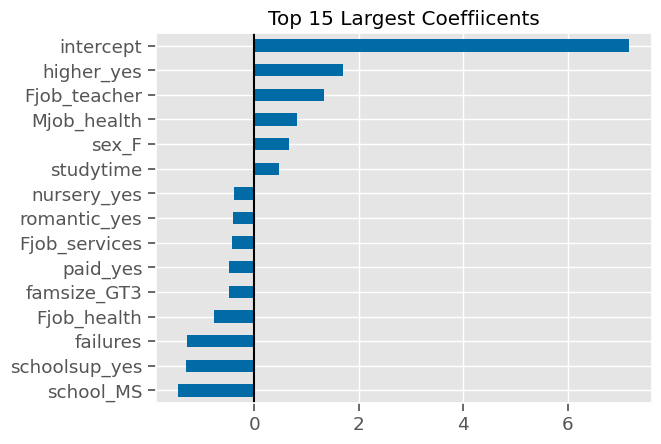

In [115]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');


In [116]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')

    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"

    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    ## return ax in case want to continue to update/modify figure
    return ax


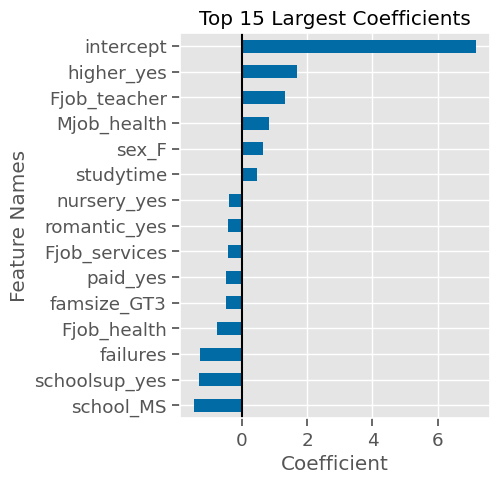

In [117]:
## Testing our function with intercept=True
ax= plot_coeffs(coeffs,top_n=15, intercept=True)


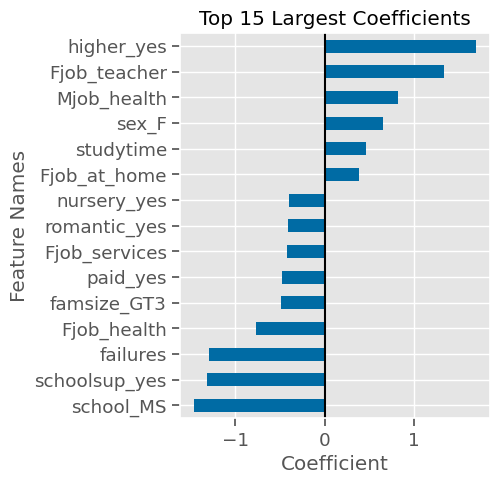

In [118]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coeffs,top_n=15)


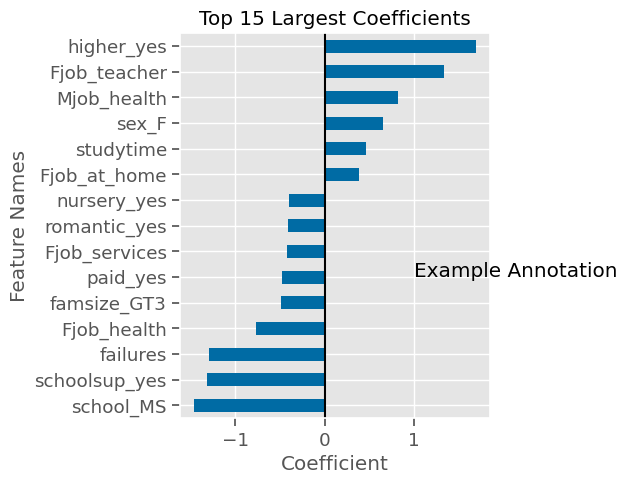

In [119]:
ax = plot_coeffs(coeffs, top_n=15)
ax.annotate("Example Annotation", xy=(1,5));

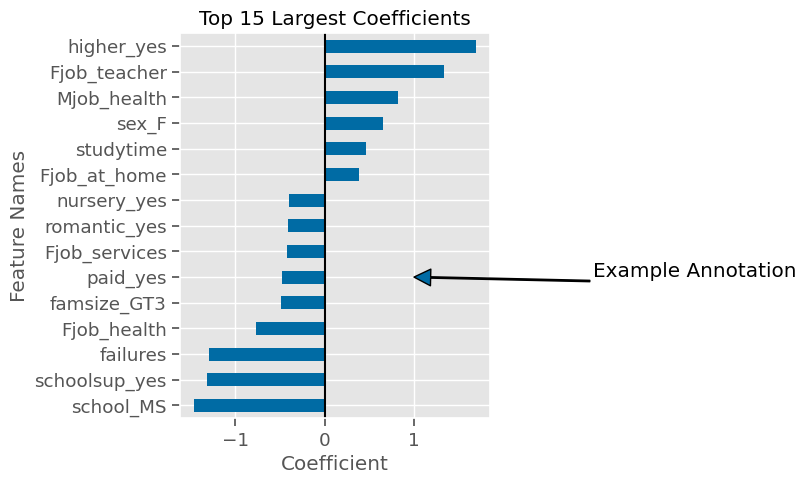

In [120]:
ax= plot_coeffs(coeffs,top_n=15)
ax.annotate("Example Annotation", xy=(1,5), xytext=(3,5),
            arrowprops={'width':1, 'ec':'k'});


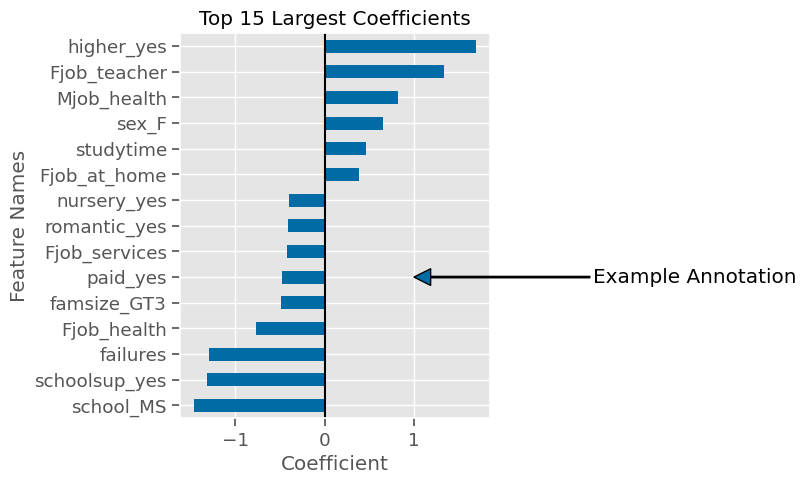

In [121]:
ax = plot_coeffs(coeffs, top_n=15)
ax.annotate("Example Annotation", xy=(1,5), xytext=(3,5), va='center',
            arrowprops={'width':1, 'ec':'k'});

In [122]:
print(type(ax.patches))
print(len(ax.patches))
ax.patches[0]


<class 'matplotlib.axes._base._AxesBase.ArtistList'>
15


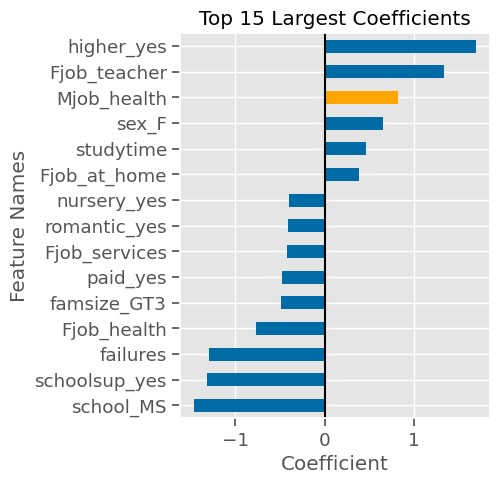

In [123]:
ax= plot_coeffs(coeffs,top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
bar.set_facecolor('orange')


In [124]:
## get height returns the width of the bar for barh
bar.get_height()


0.5

In [125]:
## get width returns the height of the bar (the coefficient to annotate)
bar.get_width()


0.8217673285285539

In [126]:
## get_x will return top-left coordinate of bar (which is at x=0)
bar.get_x()


0

In [127]:
## returns the bottom coordinate of the bar
bar.get_y()


11.75

In [128]:
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height()/2
bar_ax


12.0

In [129]:
## get the value to annotate
val = bar.get_width()
val


0.8217673285285539

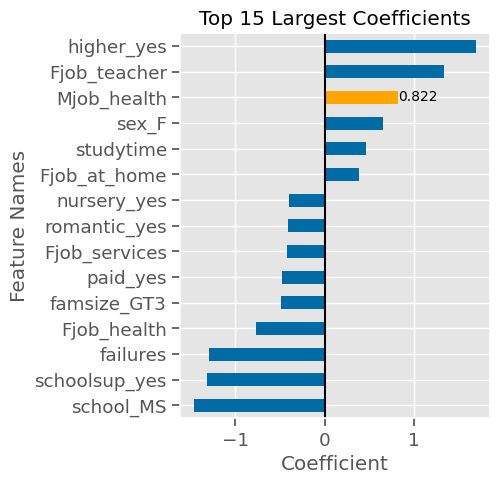

In [130]:
ax= plot_coeffs(coeffs,top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
bar.set_facecolor('orange')
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height() / 2
## get the value to annotate
val = bar.get_width()
# ha and va stand for the horizontal and vertical alignment
ax.annotate(f"{val:.3f}",
                 (val, bar_ax), ha='left', va='center', size=10) ;


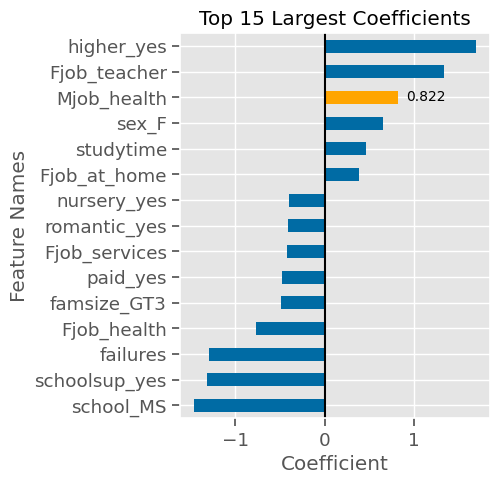

In [131]:
ax= plot_coeffs(coeffs, top_n=15)
## slicing out a test bar and changing its color to identify index
bar = ax.patches[12]
bar.set_facecolor('orange')
## calculate center of bar
bar_ax = bar.get_y() + bar.get_height() / 2
## get the value to annotate
val = bar.get_width()
# ha and va stand for the horizontal and vertical alignment
ax.annotate(f"{val:.3f}",
                 (val,bar_ax), ha='left', va='center', size=10,
           xytext=(6, 0), textcoords='offset points') ;


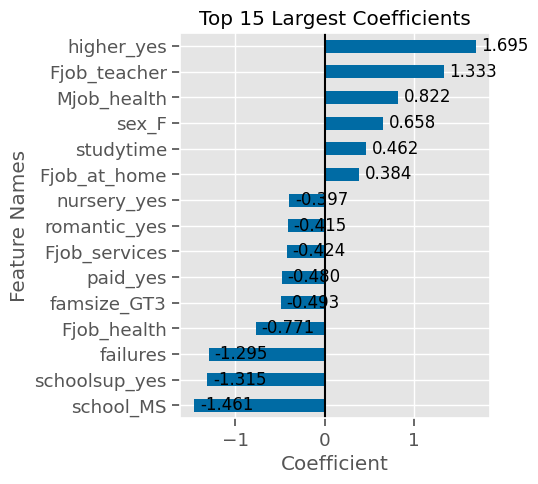

In [132]:
ax= plot_coeffs(coeffs,top_n=15)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height()/2
    ## get the value to annotate
    val = bar.get_width()
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val,bar_ax),
                ha='left',va='center',size=12,
                xytext=(4,0), textcoords='offset points')


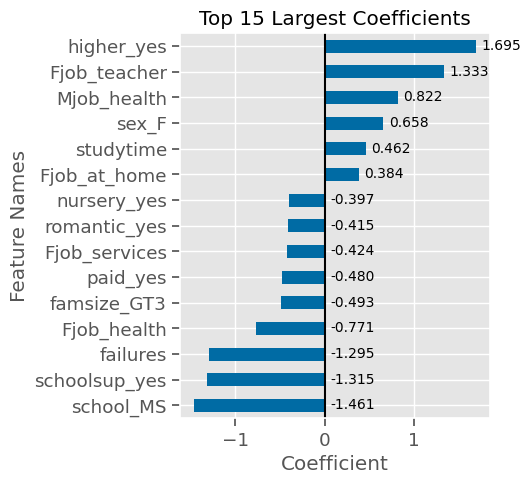

In [133]:
ax = plot_coeffs(coeffs,top_n=15)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height() / 2
    ## get the value to annotate
    val = bar.get_width()

    if val < 0:
        val_pos = 0
    else:
        val_pos = val

    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left', va='center',size=10,
                xytext=(4,0), textcoords='offset points')

In [134]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

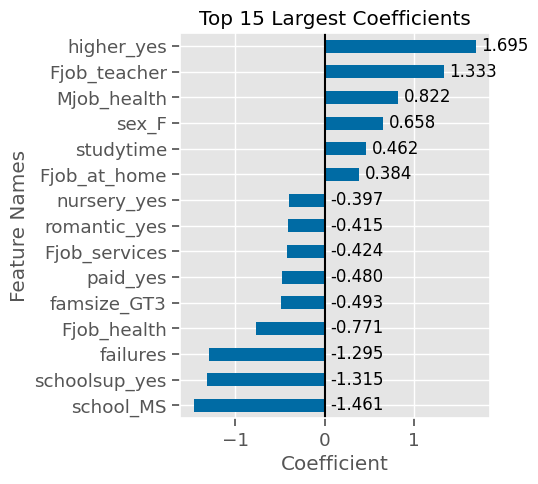

In [135]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)


In [136]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

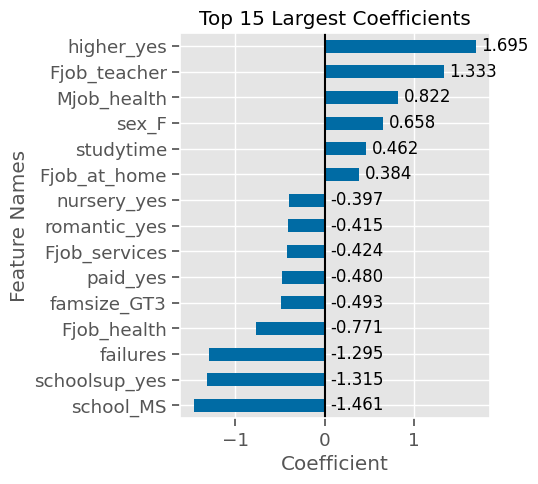

In [137]:
plot_coeffs(coeffs, top_n=15, annotate=True);

Training Data:	R^2= 0.35	RMSE= 2.65
Test Data:	R^2= 0.35	RMSE= 2.45


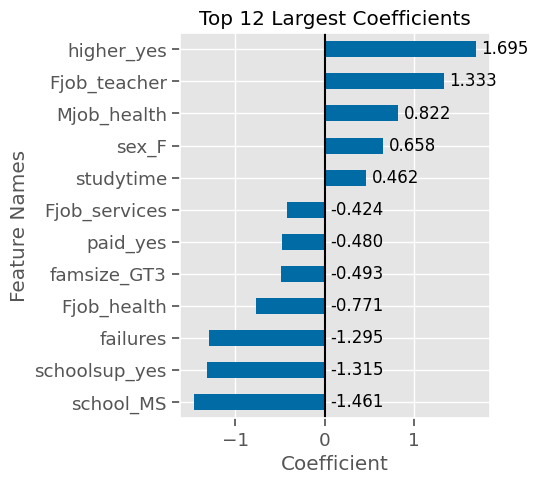

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)
coeffs = get_coeffs_linreg(lin_reg)
plot_coeffs(coeffs,top_n=12,annotate=True);


## Saving and Loading Models (joblib)

In [139]:
## Fitting and evaluating the model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df, y_train)
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.90	RMSE= 1.05
Test Data:	R^2= 0.34	RMSE= 2.46


In [140]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':rf_reg}
joblib.dump(export, 'random_forest_l01.joblib')


['random_forest_l01.joblib']

In [141]:
import joblib
loaded = joblib.load('random_forest_l01.joblib')
loaded.keys()


dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [142]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']


Training Data:	R^2= 0.90	RMSE= 1.05
Test Data:	R^2= 0.34	RMSE= 2.46


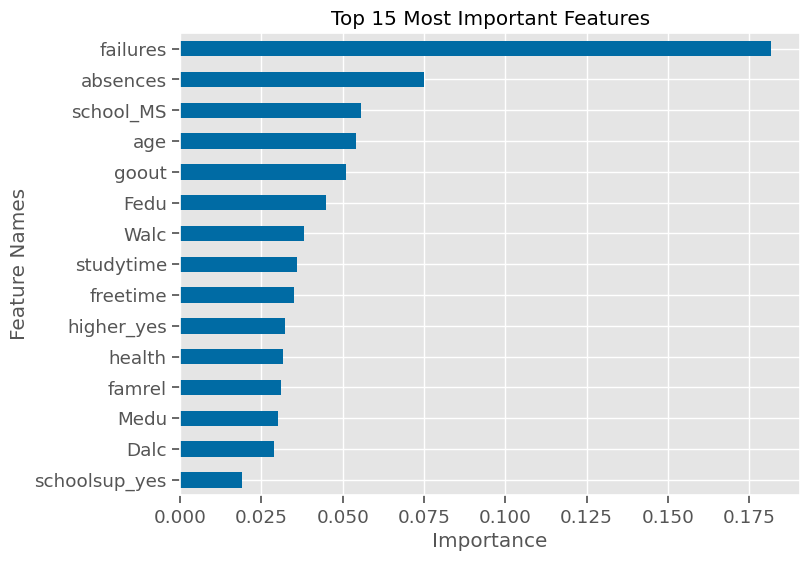

In [143]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);


## Extracting Insights from a Pipeline

In [144]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer


In [145]:
## Load dataset from published web view link
import pandas as pd
fpath ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS6Sn9LaMSc_E1EHQpuRK6BTpKp6h27obTP_dTpAVu_xtoqsge30jBGh9vYlO4DYe-utRKMgMqYChU_/pub?output=csv"
df = pd.read_csv(fpath)
df.head(3)


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat             0.02        Dairy   
1           DRC01         5.92          Regular             0.02  Soft Drinks   
2           FDN15        17.50          Low Fat             0.02         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0    249.81            OUT049                       1999      Medium   
1     48.27            OUT018                       2009      Medium   
2    141.62            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3,735.14  
1               Tier 3  Supermarket Type2             443.42  
2               Tier 1  Supermarket Type1           2,097.27

In [146]:
## replace inconsistent categories
fat_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
## Verify
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [147]:
## Define X and y
target = 'Item_Outlet_Sales'
X = df.drop(columns=target).copy()
y = df[target].copy()
X


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat             0.02   
1              DRC01         5.92          Regular             0.02   
2              FDN15        17.50          Low Fat             0.02   
3              FDX07        19.20          Regular             0.00   
4              NCD19         8.93          Low Fat             0.00   
...              ...          ...              ...              ...   
8518           FDF22         6.87          Low Fat             0.06   
8519           FDS36         8.38          Regular             0.05   
8520           NCJ29        10.60          Low Fat             0.04   
8521           FDN46         7.21          Regular             0.15   
8522           DRG01        14.80          Low Fat             0.04   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy    249.81            OUT049   
1               Soft Drinks     48.27            OUT018   
2                      Meat    141.62            OUT049   
3     Fruits and Vegetables    182.09            OUT010   
4                 Household     53.86            OUT013   
...                     ...       ...               ...   
8518            Snack Foods    214.52            OUT013   
8519           Baking Goods    108.16            OUT045   
8520     Health and Hygiene     85.12            OUT035   
8521            Snack Foods    103.13            OUT018   
8522            Soft Drinks     75.47            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type2  
2     Supermarket Type1  
3         Grocery Store  
4     Supermarket Type1  
...                 ...  
8518  Supermarket Type1  
8519  Supermarket Type1  
8520  Supermarket Type1  
8521  Supermarket Type2  
8522  Supermarket Type1  

[8523 rows x 11 columns]

In [148]:
## Drop unwanted/inappropriate columns
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
## Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [149]:
## Create categorical pipeline
cat_selector = make_column_selector(dtype_include='object')
# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
cat_pipe = make_pipeline(impute_most_freq,encoder)
## Create numeric pipelien
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)
# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc9991203d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bc996235720>)],
                  verbose_feature_names_out=False)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [151]:
## Make & Fit the modeling pipeline
pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)
## Quick peek at the R^2 value for test data
print(f"Training R2: {pipe.score(X_train,y_train) :.3f}")
print(f"Test R2: {pipe.score(X_test,y_test): .3f}")


Training R2: 0.560
Test R2:  0.566


In [152]:
from sklearn.tree import DecisionTreeRegressor


In [153]:
## Make and fit model
tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor())
tree_pipe.fit(X_train, y_train)
## Quick peek at the R^2 value for test data
print(f"Training R2: {tree_pipe.score(X_train,y_train) :.3f}")
print(f"Test R2: {tree_pipe.score(X_test,y_test): .3f}")


Training R2: 1.000
Test R2:  0.111


In [154]:
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bc9991203d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bc996235720>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [155]:
# Extracting the feature names from the pipeline
feature_names = pipe[0].get_feature_names_out()
feature_names


array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Weight', 'Item_Visibility',
       'Item_MRP'], dtype=object)

In [156]:
# Extracting the ceofficients from the pipeline
pipe[-1].coef_


array([-3.17769574e+16, -3.17769574e+16,  8.68840609e+15,  8.68840609e+15,
        8.68840609e+15,  8.68840609e+15,  8.68840609e+15,  8.68840609e+15,
        8.68840609e+15,  8.68840609e+15,  8.68840609e+15,  8.68840609e+15,
        8.68840609e+15,  8.68840609e+15,  8.68840609e+15,  8.68840609e+15,
        8.68840609e+15,  8.68840609e+15, -7.75017321e+15, -7.75017321e+15,
       -7.75017321e+15,  2.74942030e+16,  2.74942030e+16,  2.74942030e+16,
       -9.74983248e+15, -9.74983248e+15, -9.74983248e+15, -9.74983248e+15,
       -1.05000000e+01, -2.30000000e+01,  9.84562500e+02])

In [157]:
feature_names = pipe[0].get_feature_names_out()
coeffs = pd.Series(pipe[-1].coef_, index=feature_names)
coeffs


Item_Fat_Content_Low Fat          -31,776,957,373,803,988.00
Item_Fat_Content_Regular          -31,776,957,373,804,016.00
Item_Type_Baking Goods              8,688,406,090,164,187.00
Item_Type_Breads                    8,688,406,090,164,105.00
Item_Type_Breakfast                 8,688,406,090,164,205.00
Item_Type_Canned                    8,688,406,090,164,193.00
Item_Type_Dairy                     8,688,406,090,164,049.00
Item_Type_Frozen Foods              8,688,406,090,164,152.00
Item_Type_Fruits and Vegetables     8,688,406,090,164,170.00
Item_Type_Hard Drinks               8,688,406,090,164,167.00
Item_Type_Health and Hygiene        8,688,406,090,164,188.00
Item_Type_Household                 8,688,406,090,164,150.00
Item_Type_Meat                      8,688,406,090,164,166.00
Item_Type_Others                    8,688,406,090,164,148.00
Item_Type_Seafood                   8,688,406,090,164,471.00
Item_Type_Snack Foods               8,688,406,090,164,134.00
Item_Type_Soft Drinks   

In [158]:
feature_names = tree_pipe[0].get_feature_names_out()
importances = pd.Series(tree_pipe[-1].feature_importances_, index=feature_names)
importances


Item_Fat_Content_Low Fat          0.00
Item_Fat_Content_Regular          0.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.01
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.01
Item_Type_Soft Drinks             0.01
Item_Type_Starchy Foods           0.00
Outlet_Size_High                  0.00
Outlet_Size_Medium                0.01
Outlet_Size_Small                 0.01
Outlet_Location_Type_Tier 1       0.01
Outlet_Location_Type_Tier 2       0.01
Outlet_Location_Type_Tier 3       0.00
Outlet_Type_Grocery Store         0.19
Outlet_Type_Supermarket T

## From Regression to Classification

In [159]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'


In [161]:
## Load in the student performance - Portuguese dataset & display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   
2     GP   F   15       U     LE3       T     1     1  at_home    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   

   Walc  health  absences  G1  G2  G3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12

In [162]:
## convert G3 to a % out of 100
df['G3(%)'] = (df['G3']/20) *100
df['G3(%)'].head()


0   55.00
1   55.00
2   60.00
3   70.00
4   65.00
Name: G3(%), dtype: float64

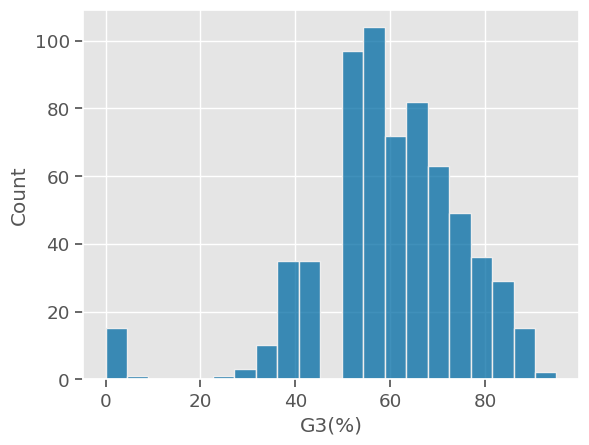

In [163]:
## visual distribution of % grades
ax = sns.histplot(data=df, x='G3(%)')


In [164]:
## defining bin edges
bins = [0,60,70,80,90,100]
grades = pd.cut(df['G3(%)'], bins=bins)
grades.value_counts().sort_index()


(0, 60]      358
(60, 70]     145
(70, 80]      85
(80, 90]      44
(90, 100]      2
Name: G3(%), dtype: int64

In [165]:
grades = pd.cut(df['G3(%)'], bins=bins,right=False)
grades.value_counts(dropna=False)


[0, 60)      301
[60, 70)     154
[70, 80)     112
[80, 90)      65
[90, 100)     17
Name: G3(%), dtype: int64

In [166]:
bins = [0,60,70,80,90,101]
grades = pd.cut(df['G3(%)'], bins=bins,right=False)
grades.value_counts()


[0, 60)      301
[60, 70)     154
[70, 80)     112
[80, 90)      65
[90, 101)     17
Name: G3(%), dtype: int64

In [167]:
## defining bins and their labels
bins = [0,60,70,80,90,101]
bin_labels = ['F','D','C','B','A']
grades = pd.cut(df['G3(%)'],bins, labels=bin_labels,include_lowest=True)
grades.value_counts()


F    373
D    145
C     85
B     44
A      2
Name: G3(%), dtype: int64

In [168]:
df['FinalGrade'] = pd.cut(df['G3(%)'],bins, labels=bin_labels,include_lowest=True)
df


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         0       yes     no   no   
3      home   mother           1          3         0        no    yes   no   
4      home   father           1          2         0        no    yes   no   
..      ...      ...         ...        ...       ...       ...    ...  ...   
644  course   mother           1          3         1        no     no   no   
645  course   mother           1          2         0        no    yes   no   
646  course   mother           2          2         0        no     no   no   
647  course   mother           2          1         0        no     no   no   
648  course   mother           3          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
644        yes      no    yes      yes       no       5         4      2   
645         no     yes    yes      yes       no       4         3      4   
646        yes     yes    yes       no       no       1         1      1   
647         no      no    yes      yes       no       2         4      5   
648         no      no    yes      yes       no       4         4      1   

     Dalc  Walc  health  absences  G1  G2  G3  G3(%) FinalGrade  
0       1     1       3         4   0  11  11  55.00          F  
1       1     1       3         2   9  11  11  55.00          F  
2       2     3       3         6  12  13  12  60.00          F  
3       1     1       5         0  14  14  14  70.00          D  
4       1     2       5         0  11  13  13  65.00          D  
..    ...   ...     ...       ...  ..  ..  ..    ...        ...  
644     1     2       5         4  10  11  10  50.00          F  
645     1     1       1         4  15  15  16  80.00          C  
646     1     1       5         6  11  12   9  45.00          F  
647     3     4       2         6  10  10  10  50.00          F  
648     3     4       5         4  10  11  11  55.00          F  

[649 rows x 35 columns]

In [169]:
## We can group by the letter grades and get the min/max of the scores to confirm
df.groupby('FinalGrade')['G3(%)'].agg(['min','max','count'])


min   max  count
FinalGrade                   
F           0.00 60.00    373
D          65.00 70.00    145
C          75.00 80.00     85
B          85.00 90.00     44
A          95.00 95.00      2

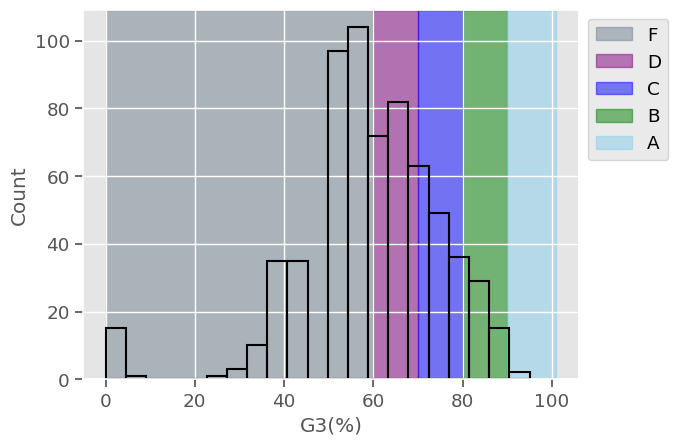

In [170]:
## visualizing the cutoffs for grades
ax = sns.histplot(data=df, x='G3(%)',color='k',fill=False)
colors = ['slategray','purple','blue','green','skyblue']
for i in range(len(bins)-1):
    x1 = bins[i]
    x2 = bins[i+1]
    label = bin_labels[i]
    ax.axvspan(x1,x2, label=label,color=colors[i],zorder=0,alpha=.5)
ax.legend(bbox_to_anchor=[1,1])


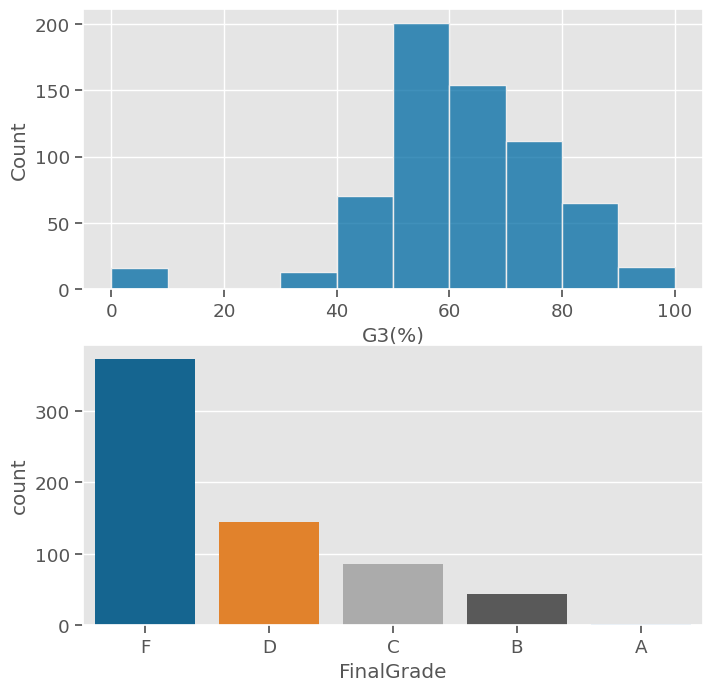

In [171]:
fig, axes = plt.subplots(nrows=2,figsize=(8,8))
sns.histplot(data=df, x='G3(%)',ax=axes[0], binwidth=10);
sns.countplot(data=df,x='FinalGrade',ax=axes[1],order=['F','D','C','B','A']);

In [172]:
## Define target as had a F or Above
df['target_F'] = df['FinalGrade'] == 'F'
df['target_F'].value_counts(normalize=True)


True    0.57
False   0.43
Name: target_F, dtype: float64

In [173]:
## Make x and y variables
drop_feats = ['G1','G2','G3','G3(%)','FinalGrade']
y = df['target_F'].copy()
X = df.drop(columns=['target_F',*drop_feats]).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

In [174]:
## make categorical & numeric selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                     fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse_output=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      verbose_feature_names_out=False)
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
104 15.00  3.00  4.00        1.00       2.00      0.00    5.00      4.00   
284 18.00  2.00  1.00        1.00       1.00      2.00    3.00      2.00   
579 18.00  1.00  3.00        1.00       1.00      0.00    4.00      3.00   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
104   4.00  1.00  1.00    1.00      0.00       0.00   1.00       1.00   
284   5.00  2.00  5.00    5.00      4.00       0.00   1.00       1.00   
579   3.00  2.00  3.00    3.00      0.00       1.00   1.00       1.00   

     famsize_LE3  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
104         0.00       0.00          0.00         0.00        0.00   
284         0.00       1.00          0.00         0.00        0.00   
579         1.00       1.00          1.00         0.00        0.00   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
104           1.00          0.00          0.00         0.00        1.00   
284           1.00          0.00          0.00         0.00        0.00   
579           0.00          0.00          0.00         0.00        0.00   

     Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
104           0.00          0.00           1.00         0.00          0.00   
284           1.00          0.00           0.00         0.00          1.00   
579           1.00          0.00           1.00         0.00          0.00   

     reason_reputation  guardian_father  guardian_mother  guardian_other  \
104               0.00             0.00             1.00            0.00   
284               0.00             0.00             1.00            0.00   
579               0.00             0.00             1.00            0.00   

     schoolsup_yes  famsup_yes  paid_yes  activities_yes  nursery_yes  \
104           0.00        1.00      0.00            1.00         1.00   
284           0.00        0.00      0.00            0.00         0.00   
579           0.00        0.00      0.00            0.00         1.00   

     higher_yes  internet_yes  romantic_yes  
104        1.00          1.00          0.00  
284        0.00          1.00          0.00  
579        0.00          1.00          1.00

In [175]:
def evaluate_classification(model, X_train,y_train,X_test,y_test,
                            normalize='true',cmap='Blues', figsize=(10,5)):
    header="\tCLASSIFICATION REPORT"
    dashes='--'*40
    print(f"{dashes}\n{header}\n{dashes}")
    ## training data
    print('[i] Training Data:')
    y_pred_train = model.predict(X_train)
    report_train = metrics.classification_report(y_train, y_pred_train)
    print(report_train)
    fig,ax = plt.subplots(figsize=figsize,ncols=2)
    metrics.ConfusionMatrixDisplay.from_estimator(model,X_train,y_train,
                                                  normalize=normalize,
                                                   cmap=cmap,ax=ax[0])
    metrics.RocCurveDisplay.from_estimator(model,X_train,y_train,ax=ax[1])
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].grid()

    fig.tight_layout()
    plt.show()

    print(dashes)
    ## test data
    print(f"[i] Test Data:")
    y_pred_test = model.predict(X_test)
    report_test = metrics.classification_report(y_test, y_pred_test)
    print(report_test)
    fig,ax = plt.subplots(figsize=figsize,ncols=2)
    metrics.ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,
                                                  normalize=normalize,
                                                   cmap=cmap, ax=ax[0])
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=ax[1])
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].grid()
    fig.tight_layout()
    plt.show()


--------------------------------------------------------------------------------
	CLASSIFICATION REPORT
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       205
        True       1.00      1.00      1.00       281

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



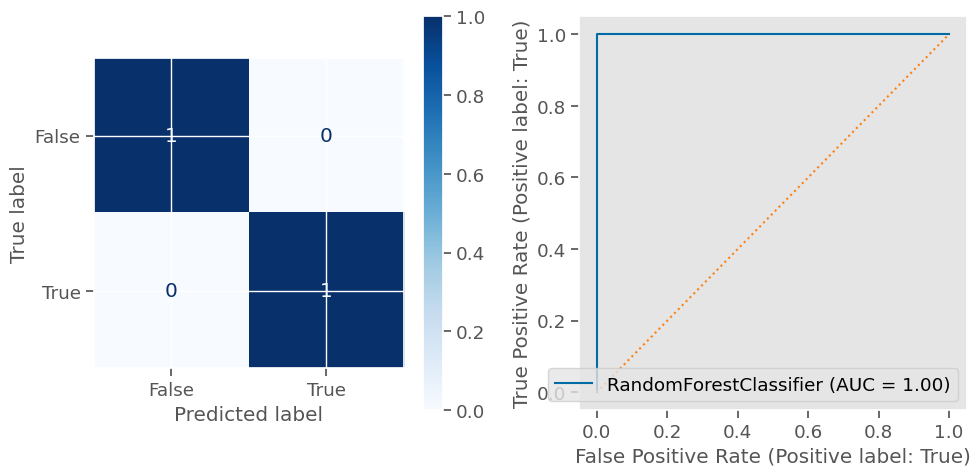

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.81      0.70      0.75        71
        True       0.79      0.87      0.83        92

    accuracy                           0.80       163
   macro avg       0.80      0.79      0.79       163
weighted avg       0.80      0.80      0.80       163



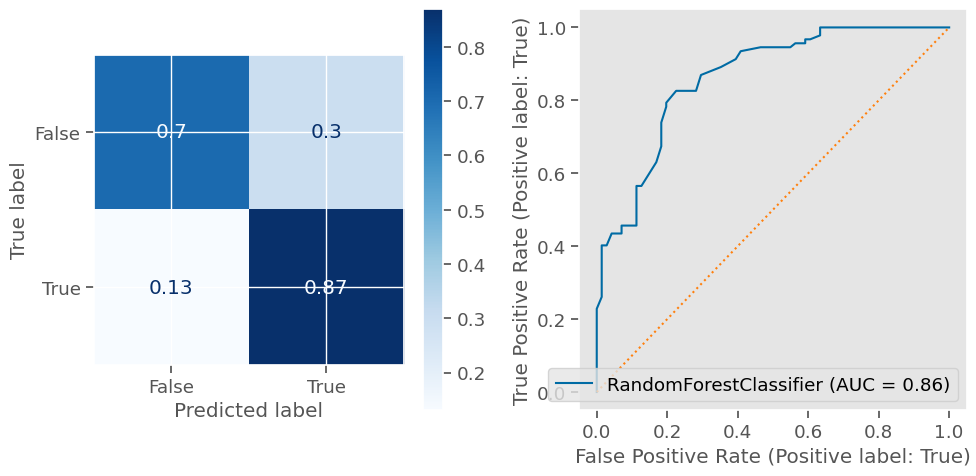

In [176]:
## fit random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()#class_weight='balanced')
rf_clf.fit(X_train_df,y_train)
evaluate_classification(rf_clf,X_train_df,y_train, X_test_df,y_test)


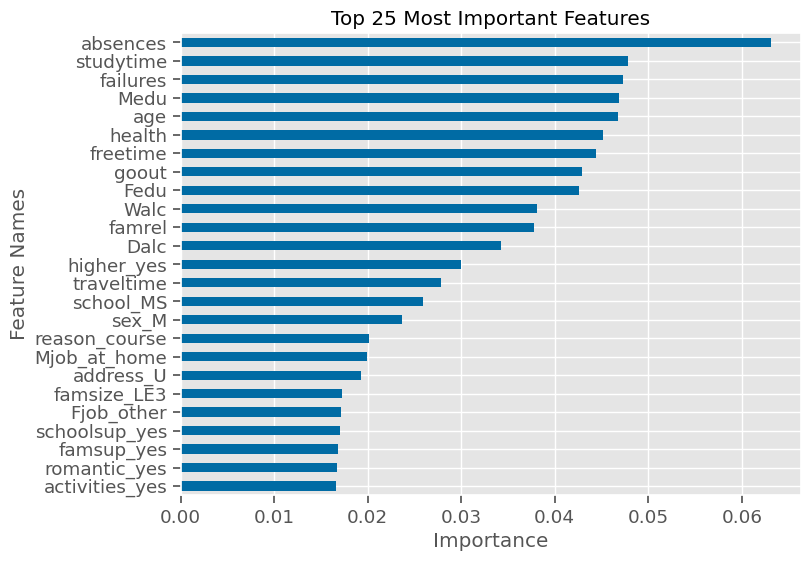

In [177]:
rf_importances = get_importances(rf_clf)
ax = plot_importance(rf_importances,top_n=25)


In [178]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_clf,X_train_df,y_train,n_jobs=-1,n_repeats=5)
r.keys()


dict_keys(['importances_mean', 'importances_std', 'importances'])

In [179]:
## getting the colors for the top 7 important rf features
colors_rf = get_color_dict(rf_importances,top_n=7)


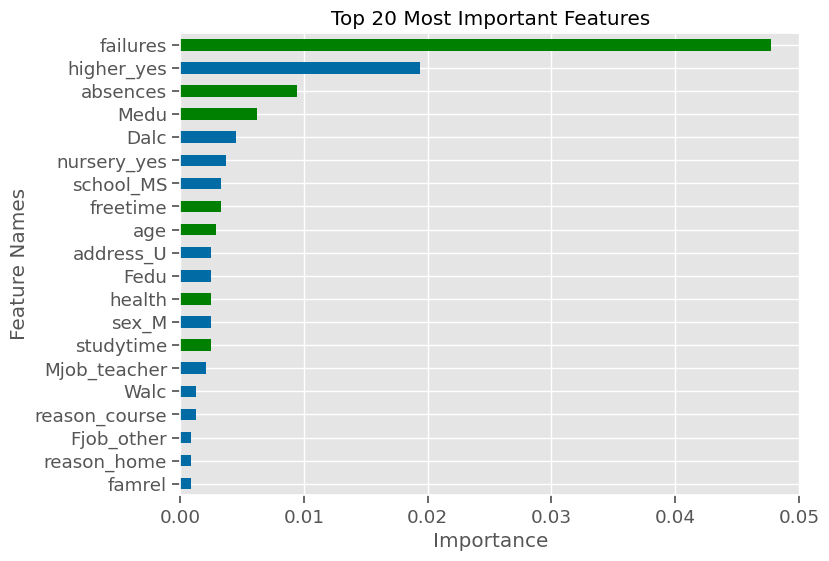

In [180]:
## can make the mean importances into a series
rf_perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
rf_perm_importances = rf_perm_importances.sort_values(ascending=False)
plot_importance_color(rf_perm_importances,color_dict=colors_rf,top_n=20);


In [181]:
# Combining all data for eda post-modeling
plot_df_train = pd.concat([X_train_df, y_train],axis=1)
plot_df_test = pd.concat([X_test_df, y_test],axis=1)
plot_df = pd.concat([plot_df_train, plot_df_test])
plot_df


age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
54  15.00  3.00  3.00        1.00       1.00      0.00    5.00      3.00   
208 16.00  2.00  3.00        2.00       1.00      0.00    5.00      3.00   
23  16.00  2.00  2.00        2.00       2.00      0.00    5.00      4.00   
547 16.00  4.00  1.00        1.00       1.00      0.00    4.00      1.00   
604 18.00  1.00  1.00        3.00       2.00      1.00    4.00      4.00   
..    ...   ...   ...         ...        ...       ...     ...       ...   
333 17.00  1.00  1.00        1.00       3.00      0.00    4.00      3.00   
454 16.00  1.00  2.00        1.00       3.00      1.00    1.00      3.00   
56  15.00  4.00  3.00        1.00       2.00      0.00    4.00      3.00   
203 17.00  1.00  2.00        1.00       2.00      0.00    3.00      1.00   
182 16.00  2.00  2.00        1.00       2.00      0.00    5.00      1.00   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
54    4.00  4.00  4.00    1.00      0.00       0.00   0.00       1.00   
208   3.00  1.00  1.00    3.00      0.00       0.00   1.00       1.00   
23    4.00  2.00  4.00    5.00      2.00       0.00   1.00       1.00   
547   2.00  2.00  1.00    2.00      0.00       1.00   1.00       0.00   
604   2.00  1.00  2.00    2.00      2.00       1.00   0.00       1.00   
..     ...   ...   ...     ...       ...        ...    ...        ...   
333   3.00  1.00  1.00    3.00      0.00       0.00   0.00       1.00   
454   2.00  1.00  2.00    4.00      3.00       1.00   0.00       1.00   
56    2.00  1.00  1.00    1.00      0.00       0.00   0.00       1.00   
203   3.00  1.00  5.00    3.00      6.00       0.00   1.00       0.00   
182   5.00  1.00  1.00    4.00      0.00       0.00   0.00       1.00   

     famsize_LE3  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
54          1.00       0.00          0.00         0.00        1.00   
208         0.00       1.00          0.00         0.00        1.00   
23          1.00       1.00          0.00         0.00        1.00   
547         1.00       1.00          0.00         0.00        1.00   
604         0.00       1.00          1.00         0.00        0.00   
..           ...        ...           ...          ...         ...   
333         0.00       1.00          0.00         0.00        0.00   
454         0.00       1.00          0.00         0.00        1.00   
56          0.00       0.00          0.00         0.00        0.00   
203         0.00       1.00          1.00         0.00        0.00   
182         0.00       1.00          0.00         0.00        1.00   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
54            0.00          0.00          0.00         0.00        1.00   
208           0.00          0.00          0.00         0.00        1.00   
23            0.00          0.00          0.00         0.00        1.00   
547           0.00          0.00          1.00         0.00        0.00   
604           0.00          0.00          0.00         0.00        0.00   
..             ...           ...           ...          ...         ...   
333           1.00          0.00          0.00         0.00        0.00   
454           0.00          0.00          0.00         0.00        0.00   
56            1.00          0.00          0.00         0.00        0.00   
203           0.00          0.00          0.00         0.00        1.00   
182           0.00          0.00          0.00         0.00        1.00   

     Fjob_services  Fjob_teacher  reason_course  reason_home  reason_other  \
54            0.00          0.00           0.00         0.00          1.00   
208           0.00          0.00           0.00         1.00          0.00   
23            0.00          0.00           0.00         0.00          0.00   
547           0.00          0.00           0.00         0.00          1.00   
604           1.00          0.00           1.00         0.00          0.00   
..    

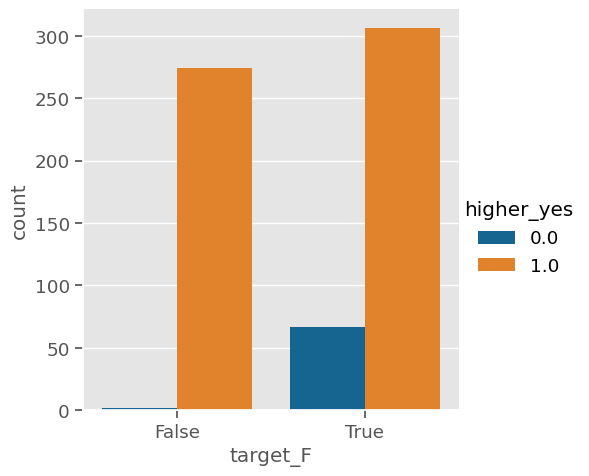

In [182]:
sns.catplot(data=plot_df, kind='count', x='target_F', hue='higher_yes');


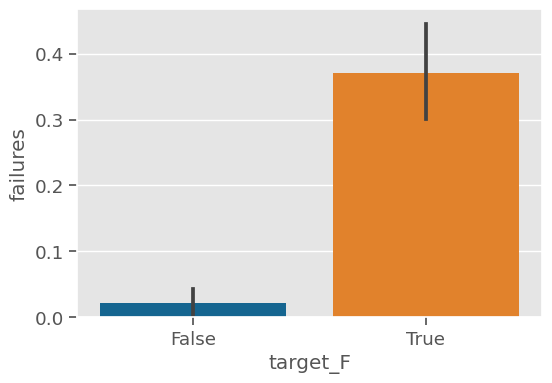

In [183]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=plot_df, x='target_F',y='failures')


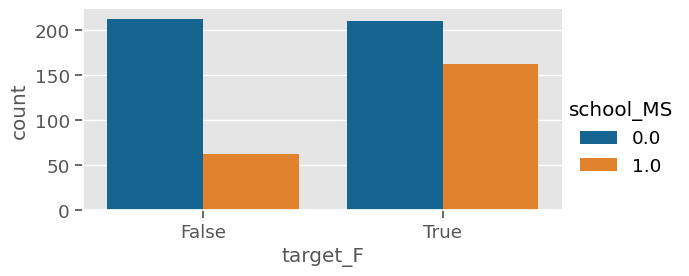

In [184]:
sns.catplot(data=plot_df, kind='count', x='target_F', hue='school_MS',
            aspect=2, height=3);


## Logistic Regression Coefficients

In [185]:
def calc_lin_reg(x):
    return x*2.713 - .8


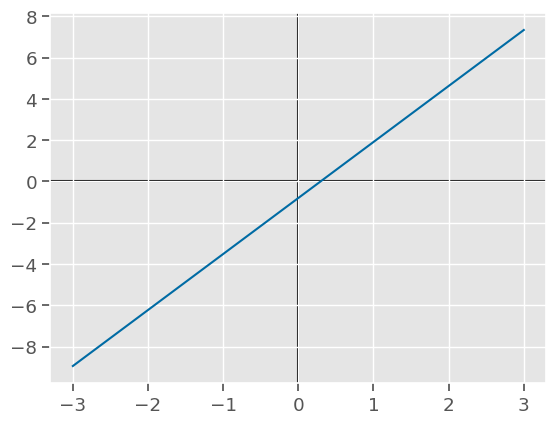

In [186]:
xs = np.linspace(-3,3)
ys = calc_lin_reg(xs)
def plot_xy(xs,ys):
    plt.plot(xs,ys)
    plt.axvline(0,color='k', zorder=0)
    plt.axhline(0, color='k', zorder=0)
plot_xy(xs,ys)


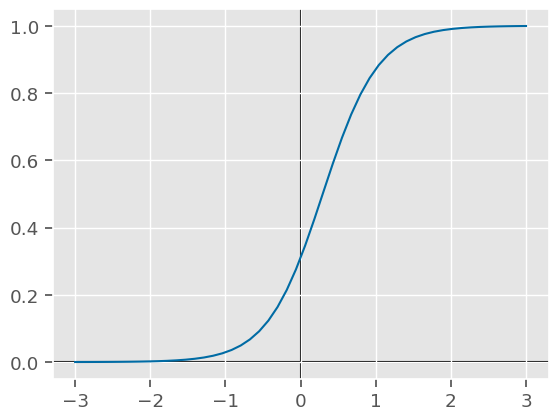

In [187]:
from math import e
def calc_sigmoid(ys):
    return 1/(1+e**-ys)
ys_sigmoid = calc_sigmoid(ys)
plot_xy(xs,ys_sigmoid)


--------------------------------------------------------------------------------
	CLASSIFICATION REPORT
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       0.73      0.71      0.72       205
        True       0.79      0.81      0.80       281

    accuracy                           0.77       486
   macro avg       0.76      0.76      0.76       486
weighted avg       0.76      0.77      0.76       486



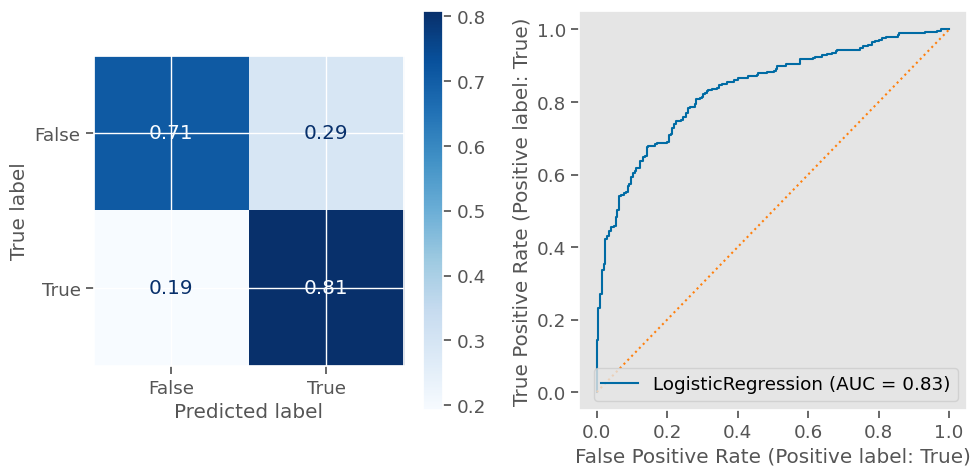

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.73      0.69      0.71        71
        True       0.77      0.80      0.79        92

    accuracy                           0.75       163
   macro avg       0.75      0.75      0.75       163
weighted avg       0.75      0.75      0.75       163



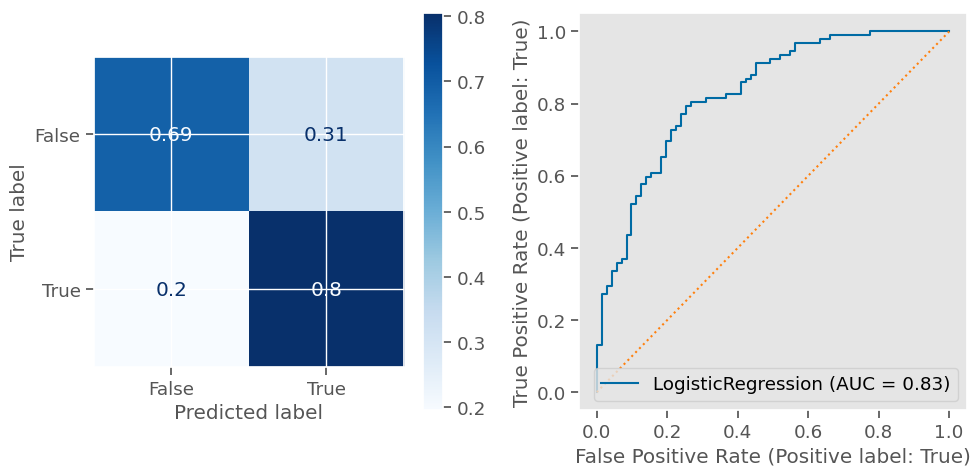

In [188]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_df, y_train)
evaluate_classification(logreg,X_train_df,y_train, X_test_df,y_test)


In [189]:
try:
    get_coeffs_linreg(logreg)
except Exception as e:
    print("ERROR: ", e)

ERROR:  Length of values (1) does not match length of index (43)


In [190]:
logreg.coef_


array([[-0.21998004, -0.18634655, -0.21570364, -0.33674885, -0.37108475,
         1.39696012, -0.25635817,  0.10222102,  0.12231776,  0.43151003,
        -0.1173833 ,  0.13284615,  0.07234924,  0.62773831,  0.61179095,
        -0.32404654,  0.13804087,  0.19604195,  0.41711263, -0.34898219,
        -0.19580839,  0.01692392,  0.11494914, -0.3023674 ,  0.3796637 ,
         0.32648321,  0.29135738, -0.69094178,  0.16910585, -0.3880756 ,
         0.21985769,  0.00330717, -0.14127519, -0.05258483,  0.19805513,
         0.94215215,  0.13853476,  0.12603854, -0.18639962, -0.07984365,
        -1.70439719, -0.07301582,  0.19134474]])

In [191]:
logreg.intercept_


array([6.25742629])

In [192]:
logreg.coef_[0]


array([-0.21998004, -0.18634655, -0.21570364, -0.33674885, -0.37108475,
        1.39696012, -0.25635817,  0.10222102,  0.12231776,  0.43151003,
       -0.1173833 ,  0.13284615,  0.07234924,  0.62773831,  0.61179095,
       -0.32404654,  0.13804087,  0.19604195,  0.41711263, -0.34898219,
       -0.19580839,  0.01692392,  0.11494914, -0.3023674 ,  0.3796637 ,
        0.32648321,  0.29135738, -0.69094178,  0.16910585, -0.3880756 ,
        0.21985769,  0.00330717, -0.14127519, -0.05258483,  0.19805513,
        0.94215215,  0.13853476,  0.12603854, -0.18639962, -0.07984365,
       -1.70439719, -0.07301582,  0.19134474])

In [193]:
logreg.intercept_[0]


6.257426292451837

In [194]:
def get_coeffs_logreg(logreg, feature_names = None, sort=True,ascending=True,
                      name='LogReg Coefficients', class_index=0):
    if feature_names is None:
        feature_names = logreg.feature_names_in_

    ## Saving the coefficients
    coeffs = pd.Series(logreg.coef_[class_index],
                       index= feature_names, name=name)

    # use .loc to add the intercept to the series
    coeffs.loc['intercept'] = logreg.intercept_[class_index]
    if sort == True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs


In [195]:
coeffs = get_coeffs_logreg(logreg)
coeffs


higher_yes          -1.70
Fjob_teacher        -0.69
reason_home         -0.39
studytime           -0.37
Mjob_health         -0.35
traveltime          -0.34
address_U           -0.32
Fjob_at_home        -0.30
famrel              -0.26
age                 -0.22
Fedu                -0.22
Mjob_other          -0.20
activities_yes      -0.19
Medu                -0.19
guardian_father     -0.14
Walc                -0.12
nursery_yes         -0.08
internet_yes        -0.07
guardian_mother     -0.05
reason_reputation    0.00
Mjob_services        0.02
absences             0.07
freetime             0.10
Mjob_teacher         0.11
goout                0.12
paid_yes             0.13
health               0.13
famsize_LE3          0.14
famsup_yes           0.14
reason_course        0.17
romantic_yes         0.19
Pstatus_T            0.20
guardian_other       0.20
reason_other         0.22
Fjob_services        0.29
Fjob_other           0.33
Fjob_health          0.38
Mjob_at_home         0.42
Dalc        

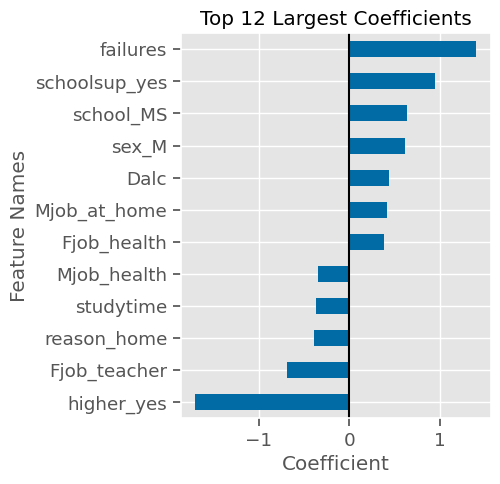

In [196]:
ax = plot_coeffs(coeffs,top_n=12)


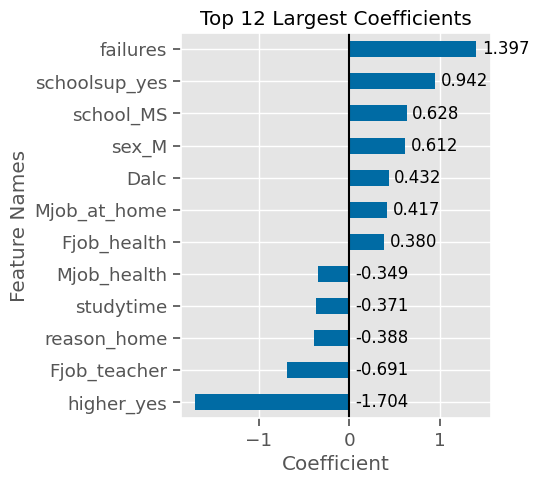

In [197]:
ax = plot_coeffs(coeffs,top_n=12,annotate=True)

In [198]:
## logodds coeff for failures
coeffs.loc['failures']


1.3969601243113319

In [199]:
## Raising e to the power of our logodds coeff
import math
math.e**coeffs.loc['failures']


4.042891380816965

<Axes: title={'center': 'All Coefficients - Ranked by Magnitude'}, xlabel='Coefficient', ylabel='Feature Names'>

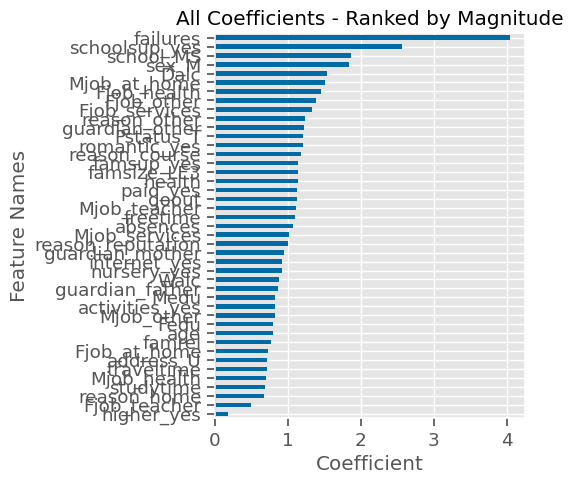

In [200]:
coeffs_odds = np.exp(coeffs)
plot_coeffs(coeffs_odds)

In [201]:
def get_coeffs_logreg(logreg, feature_names = None, sort=True,ascending=True,
                      name='LogReg Coefficients', class_index=0,
                      include_intercept=False, as_odds=False):

    if feature_names is None:
        feature_names = logreg.feature_names_in_

    ## Saving the coefficients
    coeffs = pd.Series(logreg.coef_[class_index],
                       index= feature_names, name=name)

    if include_intercept:
        # use .loc to add the intercept to the series
        coeffs.loc['intercept'] = logreg.intercept_[class_index]

    if as_odds==True:
        coeffs = np.exp(coeffs)
    if sort == True:
        coeffs = coeffs.sort_values(ascending=ascending)


    return coeffs

In [202]:
coeffs_odds = get_coeffs_logreg(logreg, as_odds=True)
coeffs_odds


higher_yes          0.18
Fjob_teacher        0.50
reason_home         0.68
studytime           0.69
Mjob_health         0.71
traveltime          0.71
address_U           0.72
Fjob_at_home        0.74
famrel              0.77
age                 0.80
Fedu                0.81
Mjob_other          0.82
activities_yes      0.83
Medu                0.83
guardian_father     0.87
Walc                0.89
nursery_yes         0.92
internet_yes        0.93
guardian_mother     0.95
reason_reputation   1.00
Mjob_services       1.02
absences            1.08
freetime            1.11
Mjob_teacher        1.12
goout               1.13
paid_yes            1.13
health              1.14
famsize_LE3         1.15
famsup_yes          1.15
reason_course       1.18
romantic_yes        1.21
Pstatus_T           1.22
guardian_other      1.22
reason_other        1.25
Fjob_services       1.34
Fjob_other          1.39
Fjob_health         1.46
Mjob_at_home        1.52
Dalc                1.54
sex_M               1.84


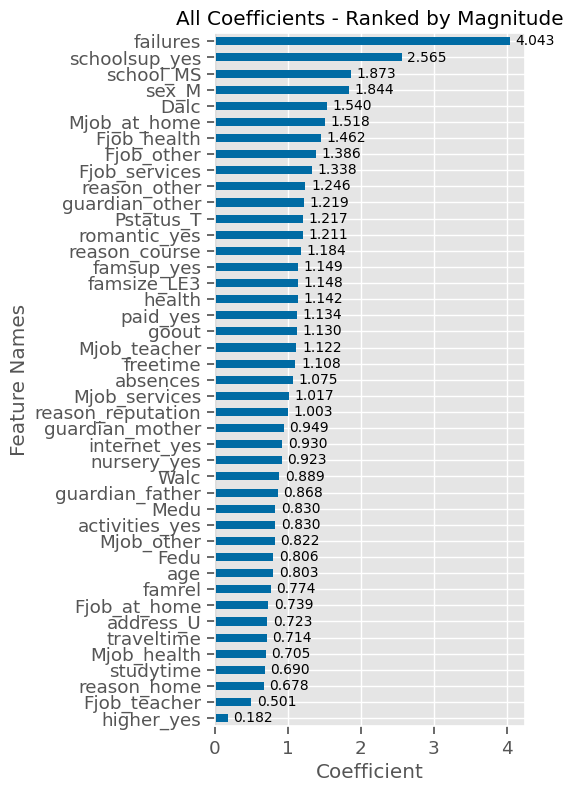

In [203]:
coeffs_odds = get_coeffs_logreg(logreg, as_odds=True)
ax = plot_coeffs(coeffs_odds,annotate=True,figsize=(4,9),size=10)


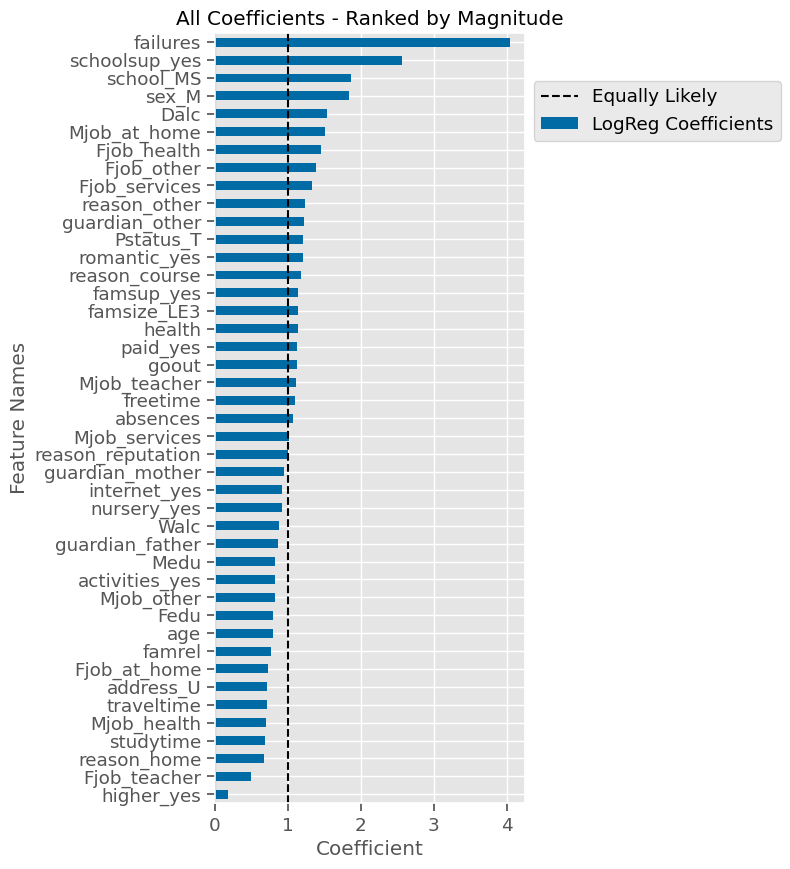

In [204]:
ax = plot_coeffs(coeffs_odds,annotate=False,figsize=(4,10))
ax.axvline(1, ls='--',label='Equally Likely',color='k', zorder=1)
ax.legend(bbox_to_anchor=[1,.95]);


## Advanced Matplotlib

In [205]:
colors_dict = {}
for i in coeffs.index:
    rounded_coeff = np.round( coeffs.loc[i],3)
    if rounded_coeff < 1:
        color = 'darkred'
    elif rounded_coeff > 1:
        color = 'forestgreen'
    else:
        color= 'gray'
    colors_dict[i] = color

## previewing example >1 and <1
colors_dict['failures'],colors_dict['higher_yes']


('forestgreen', 'darkred')

In [206]:
def get_colors_gt_lt(coeffs, threshold=1, color_lt ='darkred',
                     color_gt='forestgreen', color_else='gray'):
    """Creates a dictionary of features:colors based on if value is > or < threshold"""
    colors_dict = {}
    for i in coeffs.index:
        rounded_coeff = np.round( coeffs.loc[i],3)
        if rounded_coeff < threshold:
            color = color_lt
        elif rounded_coeff > threshold:
            color = color_gt
        else:
            color=color_else
        colors_dict[i] = color
    return colors_dict


In [207]:
def plot_coeffs_color(coeffs, top_n=None,  figsize=(8,6), color_dict=None,
                   plot_kws = {}):
    """Plots series of coefficients

    Args:
        ceoffs (pands Series): importance values to plot
        top_n (int): The # of features to display (Default=None).
                        If None, display all.
                        otherwise display top_n most important

        figsize (tuple): figsize tuple for .plot
        color_dict (dict): dict with index values as keys with color to use as vals
                            Uses series.index.map(color_dict).
        plot_kws (dict): additional keyword args accepted by panda's .plot

    Returns:
        Axis: matplotlib axis
        """

    # sorting with asc=false for correct order of bars

    if top_n is None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"

    ## plotting top N importances
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        plot_kws.update({'color':colors})

    ax = plot_vals.plot(kind='barh', figsize=figsize,**plot_kws)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


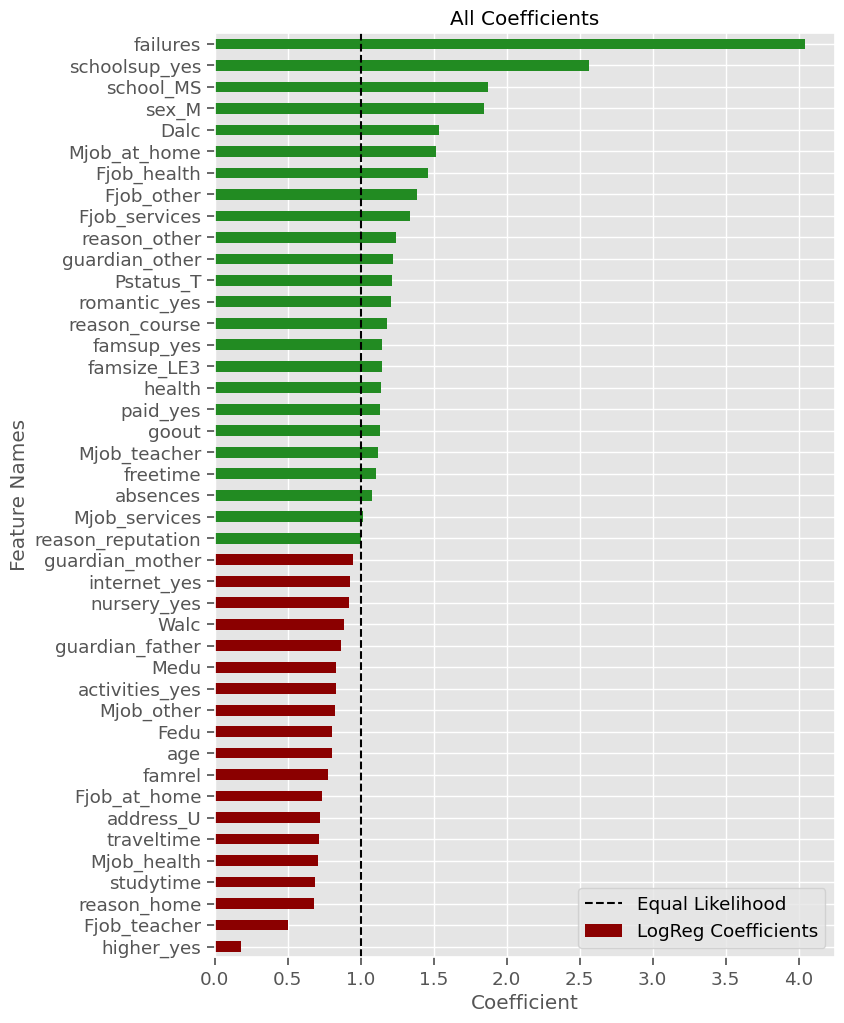

In [208]:
colors_odds = get_colors_gt_lt(coeffs_odds,threshold=1)
ax = plot_coeffs_color(coeffs_odds,color_dict=colors_odds,figsize=(8,12))
ax.axvline(1, ls='--',label='Equal Likelihood',color='k',
          zorder=1)
ax.legend();

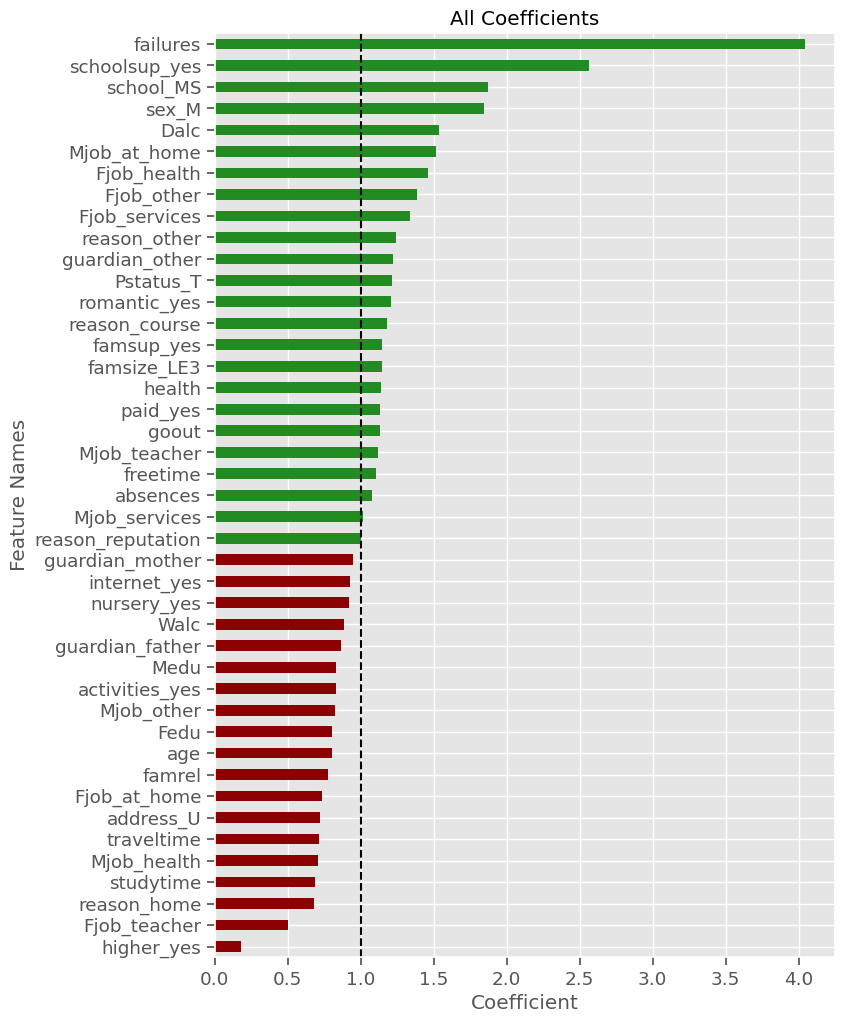

In [209]:
color_lt = 'darkred'
color_gt = 'forestgreen'
colors_odds = get_colors_gt_lt(coeffs_odds,threshold=1,color_lt=color_lt,
                              color_gt=color_gt)
ax = plot_coeffs_color(coeffs_odds,color_dict=colors_odds,figsize=(8,12))
axline = ax.axvline(1, ls='--',label='Equal Likelihood',color='k',
          zorder=1);


In [210]:
from matplotlib.patches import Patch
box_lt = Patch(color=color_lt)
box_gt = Patch(color=color_gt)


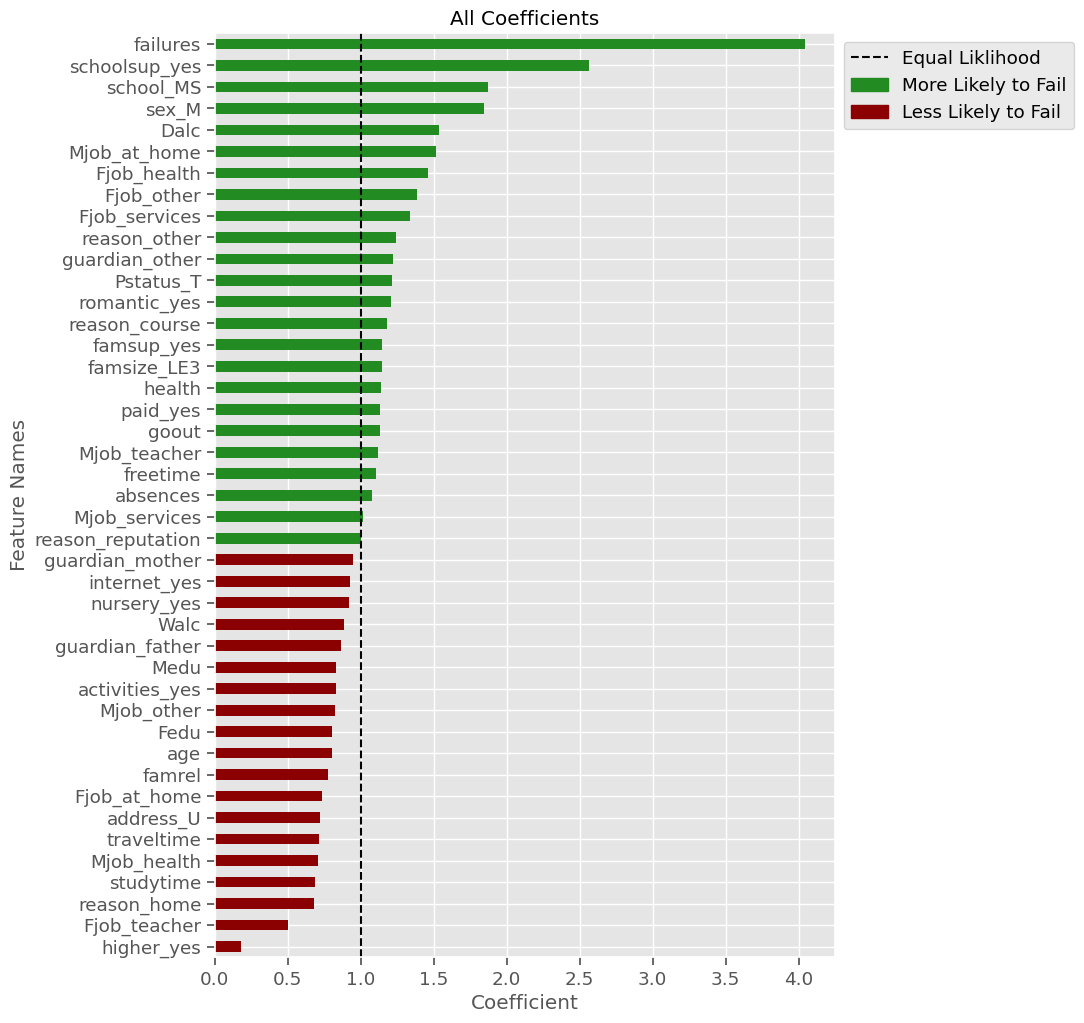

In [211]:
## make list of handles and associated labels
handles = [axline,box_gt,box_lt]
labels = ['Equal Liklihood','More Likely to Fail', "Less Likely to Fail"]
ax.legend(handles,labels,bbox_to_anchor=[1,1])
## remember - we can't see the ax on its own, so we nee the figure!
ax.get_figure()


In [212]:
def plot_coeffs_color(coeffs, top_n=None,  figsize=(8,6), legend_loc='best',
                      threshold=None, color_lt='darkred', color_gt='forestgreen',
                      color_else='gray', label_thresh='Equally Likely',
                      label_gt='More Likely', label_lt='Less Likely',
                   plot_kws = {}):
    """Plots series of coefficients
        Args:
        ceoffs (pands Series): importance values to plot
        top_n (int): The # of features to display (Default=None).
                         If None, display all.
                        otherwise display top_n most important

        figsize (tuple): figsize tuple for .plot
        color_dict (dict): dict with index values as keys with color to use as vals
                            Uses series.index.map(color_dict).
        plot_kws (dict): additional keyword args accepted by panda's .plot


         Returns:
        Axis: matplotlib axis
    """
    # sorting with asc=false for correct order of bars
    if top_n is None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        ## plotting top N importances
    if threshold is not None:
        color_dict = get_colors_gt_lt(plot_vals, threshold=threshold,
                                      color_gt=color_gt,color_lt=color_lt,
                                      color_else=color_else)
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        plot_kws.update({'color':colors})


    ax = plot_vals.plot(kind='barh', figsize=figsize,**plot_kws)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)

    if threshold is not None:
        ln1 = ax.axvline(threshold,ls=':',color='black')
        from matplotlib.patches import Patch
        box_lt = Patch(color=color_lt)
        box_gt = Patch(color=color_gt)
        handles = [ln1,box_gt,box_lt]
        labels = [label_thresh,label_gt,label_lt]
        ax.legend(handles,labels, loc=legend_loc)
    ## return ax in case want to continue to update/modify figure
    return ax

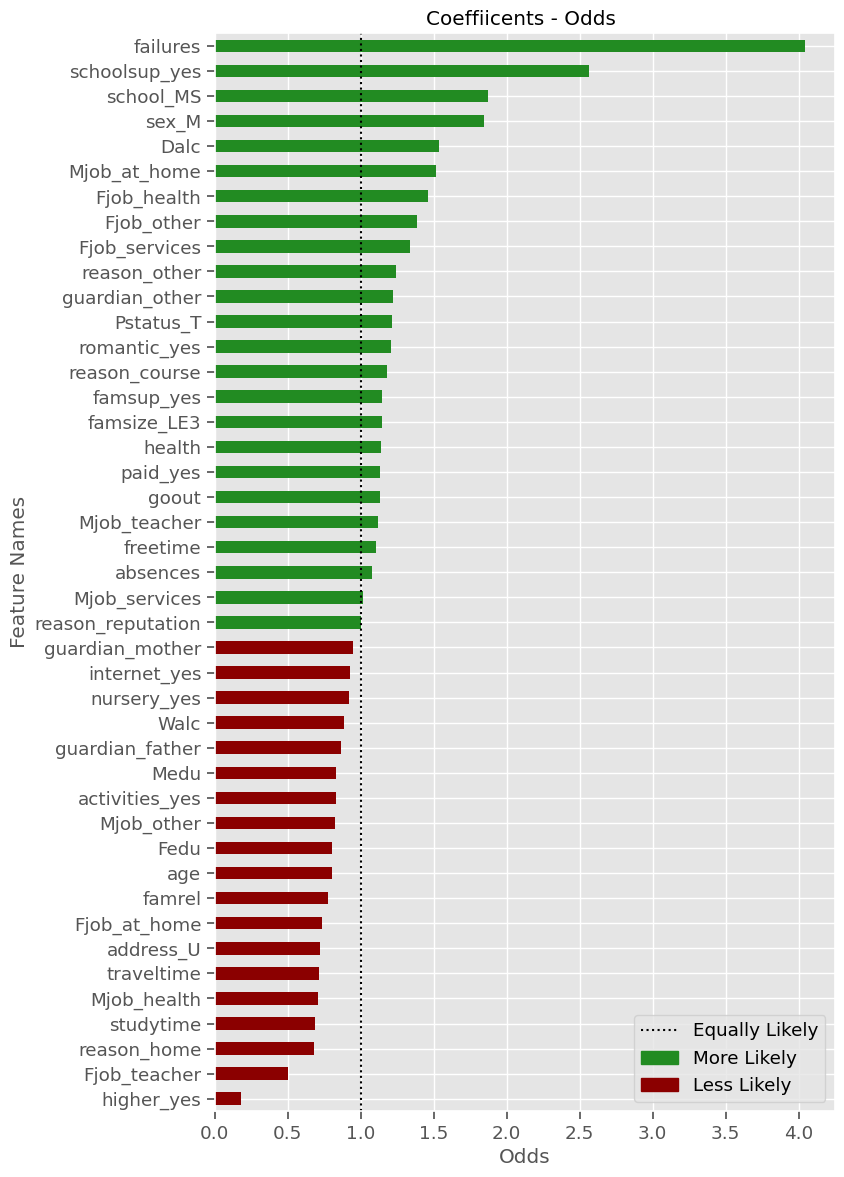

In [213]:
ax = plot_coeffs_color(coeffs_odds,threshold=1,figsize=(8,14));
ax.set(xlabel='Odds', title='Coeffiicents - Odds ')
fig = ax.get_figure()


## SHAP Model Explainers - Global

--------------------------------------------------------------------------------
	CLASSIFICATION REPORT
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       205
        True       1.00      1.00      1.00       281

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



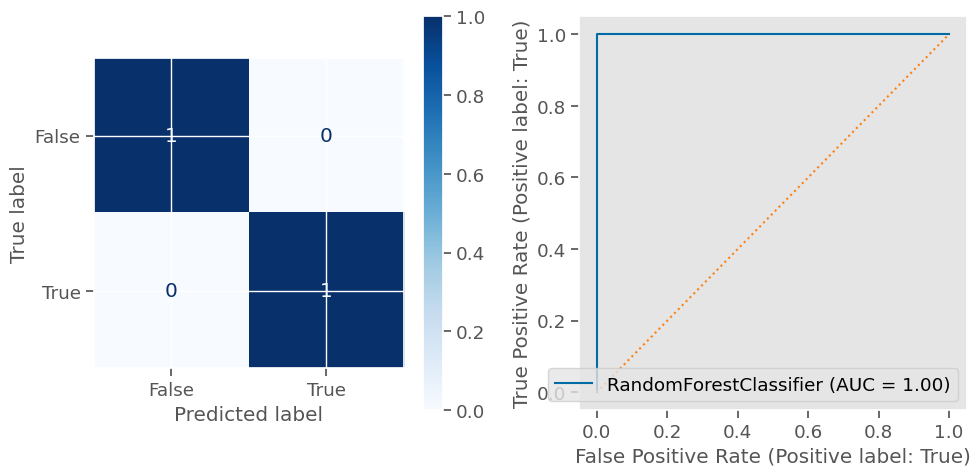

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.81      0.70      0.75        71
        True       0.79      0.87      0.83        92

    accuracy                           0.80       163
   macro avg       0.80      0.79      0.79       163
weighted avg       0.80      0.80      0.80       163



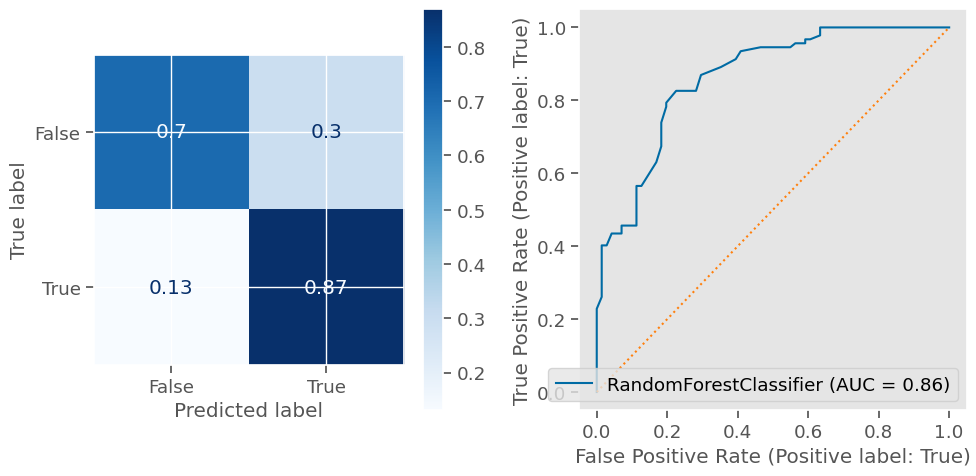

In [214]:
evaluate_classification(rf_clf,X_train_df,y_train, X_test_df,y_test)

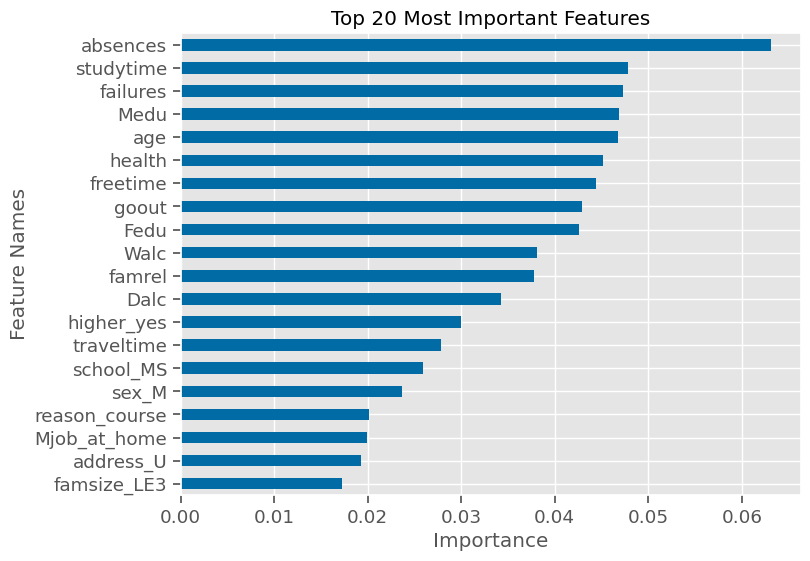

In [215]:
rf_importances = get_importances(rf_clf)
plot_importance(rf_importances,top_n=20);
